# Gráficas

### Importar librerías a utilizar

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

### Recorrer directorio

In [2]:
#Directorio a recorrer
path_mat = '/home/bryan/Escritorio/Paper/DataCSV/'

def Ficheros(path, formato):
    contenido = os.listdir(path)

    #Acumulador del nombre de las   imagenes a utilizar
    archivos = []

    #Se recorre el path para obtener los nombre y se los aggrega al acumulador, en este caso la lista
    for fichero in contenido:
        if os.path.isfile(os.path.join(path, fichero)) and fichero.endswith(formato):
            archivos.append(fichero)
            
    return archivos


#Verificar si obtiene los archivos
print(len(Ficheros(path_mat, '.csv')))

100


# Funciones a utilizar

In [3]:
archivos = Ficheros(path_mat, '.csv')
prueba_1 = []
prueba_4 = []
for archivo in archivos:
    if archivo.startswith('1_'):
        prueba_1.append(archivo)
    
    elif archivo.startswith('4_'):
        prueba_4.append(archivo)

prueba_1.sort()
prueba_4.sort()

In [4]:
def cols_exp(archivos, sensor):
    index_ex = []
    for archivo in archivos:
        index_ex.append('X'+str(sensor)+'-'+ archivo[:-4])
        index_ex.append('Y'+str(sensor)+'-'+ archivo[:-4])
        index_ex.append('Z'+str(sensor)+'-'+ archivo[:-4])
    return index_ex

In [5]:
def dataframe_chipeado(lista, inicio, fin):
    df_HB={}
    
    for csv in range(len(lista)):
        df_t = pd.read_csv(path_mat + lista[csv])
        a1 = df_t.iloc[:,inicio: fin]
        
        for i in range(3):
            df_HB[lista[csv][:-4]] = a1.iloc[:,i].values.tolist()
            #print(a1.iloc[:,i][0])
    


    df_HB= pd.DataFrame(df_HB)
   
    return df_HB

In [6]:
def dataframe_chipeado(lista, inicio, fin, sensor):
    df_HB={}
    prueba = cols_exp(lista, sensor)
    df_HB = pd.DataFrame(df_HB)
    for csv in range(len(lista)):
        df_t = pd.read_csv(path_mat + lista[csv])
        a1 = df_t.iloc[:, inicio:fin]
        df_HB= pd.concat([df_HB, a1], ignore_index=True, axis = 1)
        
    df_HB.columns = prueba
    
    return df_HB

# Gráficos y Correlaciones por Sensor

# Sensor 1

### Healthy Bar

In [7]:
base_1 = dataframe_chipeado(prueba_1, 1, 4, 1)
base_1

,X1-1_10_05A,Y1-1_10_05A,Z1-1_10_05A,X1-1_10_1A,Y1-1_10_1A,Z1-1_10_1A,X1-1_10_2A,Y1-1_10_2A,Z1-1_10_2A,X1-1_10_3A,...,Z1-1_9_05A,X1-1_9_1A,Y1-1_9_1A,Z1-1_9_1A,X1-1_9_2A,Y1-1_9_2A,Z1-1_9_2A,X1-1_9_3A,Y1-1_9_3A,Z1-1_9_3A
0,0.000213,0.000274,0.000279,0.000168,0.000277,0.000168,0.000447,0.000273,0.000168,0.000061,...,0.000236,0.000152,0.000279,0.000139,0.000205,0.000190,0.000172,0.000359,0.000654,0.000227
1,0.000192,0.000265,0.000262,0.000157,0.000231,0.000301,0.000078,0.000384,0.000237,0.000452,...,0.000224,0.000168,0.000185,0.000218,0.000207,0.000244,0.000182,-0.000281,0.000134,0.000207
2,0.000175,0.000227,0.000212,0.000190,0.000260,0.000160,0.000168,0.000291,0.000252,-0.000143,...,0.000241,0.000199,0.000271,0.000146,-0.000074,0.000276,0.000283,0.000411,0.000363,0.000212
3,0.000185,0.000281,0.000237,0.000114,0.000290,0.000304,0.000302,0.000215,0.000137,0.000319,...,0.000188,0.000207,0.000292,0.000277,0.000295,0.000088,0.000127,0.000338,0.000208,0.000295
4,0.000185,0.000275,0.000246,0.000156,0.000241,0.000263,0.000026,0.000287,0.000279,0.000257,...,0.000230,0.000143,0.000224,0.000240,0.000260,0.000442,0.000416,0.000008,0.000198,0.000590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99092,0.000177,0.000263,0.000251,0.000181,0.000234,0.000257,0.000101,0.000272,0.000194,0.000057,...,0.000252,0.000215,0.000233,0.000249,0.000399,0.000140,0.000070,0.000070,0.000875,0.000448
99093,0.000229,0.000315,0.000240,0.000123,0.000241,0.000251,-0.000044,0.000501,0.000360,0.000078,...,0.000208,0.000163,0.000249,0.000278,-0.000038,0.000193,0.000311,0.000259,0.000110,0.000260
99094,0.000185,0.000283,0.000262,0.000186,0.000268,0.000279,0.000403,0.000143,-0.000009,-0.000005,...,0.000207,0.000173,0.000225,0.000230,0.000200,0.000310,0.000252,0.000343,0.000226,0.000113
99095,0.000178,0.000325,0.000251,0.000135,0.000332,0.000231,0.000127,0.000288,0.000413,0.000419,...,0.000256,0.000127,0.000305,0.000224,0.000411,0.000343,0.000269,-0.000166,-0.000013,0.000501


In [8]:
base_1.isnull().sum()

X1-1_10_05A    0
Y1-1_10_05A    0
Z1-1_10_05A    0
X1-1_10_1A     0
Y1-1_10_1A     0
              ..
Y1-1_9_2A      0
Z1-1_9_2A      0
X1-1_9_3A      0
Y1-1_9_3A      0
Z1-1_9_3A      0
Length: 120, dtype: int64

In [9]:
basex = base_1.iloc[:,0::3]
basey = base_1.iloc[:,1::3]
basez = base_1.iloc[:,2::3]

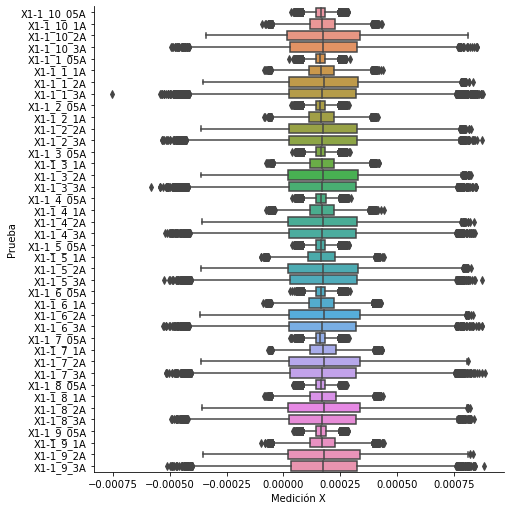

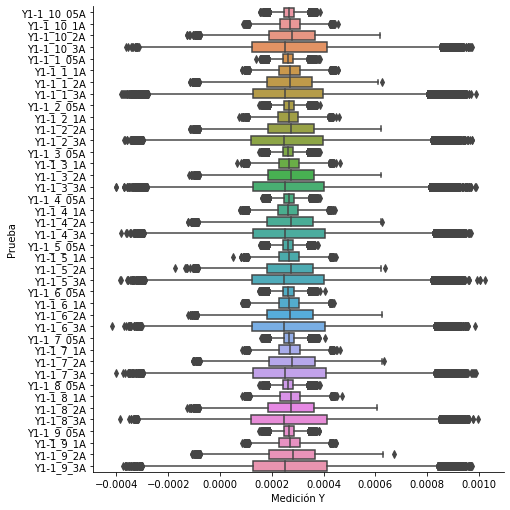

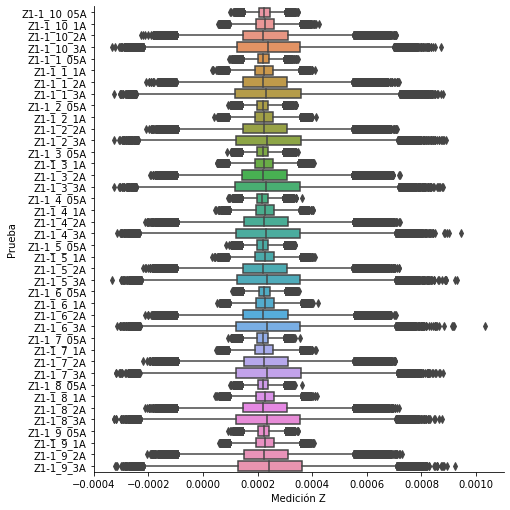

In [10]:
g = sns.catplot(data=basex, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición X", "Prueba")
g = sns.catplot(data=basey, orient="h",kind="box", height = 7)
g.set_axis_labels("Medición Y", "Prueba")
g = sns.catplot(data=basez, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición Z", "Prueba")

In [11]:
corr_matrix = base_1.corr()
corr_matrix.head()

,X1-1_10_05A,Y1-1_10_05A,Z1-1_10_05A,X1-1_10_1A,Y1-1_10_1A,Z1-1_10_1A,X1-1_10_2A,Y1-1_10_2A,Z1-1_10_2A,X1-1_10_3A,...,Z1-1_9_05A,X1-1_9_1A,Y1-1_9_1A,Z1-1_9_1A,X1-1_9_2A,Y1-1_9_2A,Z1-1_9_2A,X1-1_9_3A,Y1-1_9_3A,Z1-1_9_3A
X1-1_10_05A,1.000000,0.376824,0.416722,0.186037,0.085192,-0.145173,0.149833,-0.015196,-0.080724,-0.143428,...,0.017808,0.138157,0.055764,-0.190100,-0.154016,-0.023193,0.127079,0.212597,0.118753,-0.127555
Y1-1_10_05A,0.376824,1.000000,0.445120,-0.131839,0.113235,0.052774,-0.002133,0.007286,0.088319,0.123831,...,0.022434,-0.134303,0.095565,0.012943,0.053041,0.055408,-0.093777,-0.100802,0.093832,0.019915
Z1-1_10_05A,0.416722,0.445120,1.000000,-0.090631,-0.061507,0.032731,-0.109971,-0.009518,0.066725,0.143198,...,0.044425,-0.100886,-0.078568,0.013638,0.044516,0.041356,-0.021002,-0.072103,-0.041804,0.028068
X1-1_10_1A,0.186037,-0.131839,-0.090631,1.000000,0.057170,-0.070369,0.314158,0.146759,-0.299392,-0.296590,...,-0.070485,0.791348,-0.123729,-0.338696,0.058306,-0.026472,0.090757,0.137747,0.118497,-0.122727
Y1-1_10_1A,0.085192,0.113235,-0.061507,0.057170,1.000000,0.335115,0.197272,-0.259944,0.243722,-0.001148,...,-0.024396,-0.121721,0.590877,-0.005222,-0.280093,0.163760,0.077316,0.292363,0.149676,-0.170591


### Unlocked Bolt

In [12]:
base_4 = dataframe_chipeado(prueba_4, 1, 4, 1)
base_4.head()

,X1-4_1_05A,Y1-4_1_05A,Z1-4_1_05A,X1-4_1_1A,Y1-4_1_1A,Z1-4_1_1A,X1-4_1_2A,Y1-4_1_2A,Z1-4_1_2A,X1-4_1_3A,...,Z1-4_5_05A,X1-4_5_1A,Y1-4_5_1A,Z1-4_5_1A,X1-4_5_2A,Y1-4_5_2A,Z1-4_5_2A,X1-4_5_3A,Y1-4_5_3A,Z1-4_5_3A
0,0.000168,0.000204,0.000213,0.000113,0.000255,0.000253,0.000348,0.000378,0.000161,0.000296,...,0.000208,0.000127,0.000301,0.000182,-0.000191,0.000152,0.000256,0.000386,0.000472,0.000146
1,0.000122,0.000277,0.000213,0.000250,0.000304,0.000167,-0.000022,0.000237,0.000441,0.000127,...,0.000214,0.000116,0.000216,0.000193,0.000261,0.000126,0.000125,0.000168,0.000451,0.000357
2,0.000099,0.000214,0.000128,0.000188,0.000299,0.000235,0.000208,0.000299,-0.000037,0.000122,...,0.000160,0.000113,0.000196,0.000180,0.000070,0.000297,0.000070,0.000001,0.000105,0.000202
3,0.000150,0.000258,0.000209,0.000049,0.000233,0.000232,0.000124,0.000316,0.000358,0.000263,...,0.000185,0.000173,0.000166,0.000210,-0.000035,0.000227,0.000082,0.000459,0.000322,0.000367
4,0.000194,0.000244,0.000194,0.000284,0.000258,0.000203,-0.000068,0.000024,0.000156,0.000332,...,0.000169,0.000061,0.000259,0.000157,0.000199,0.000226,0.000226,0.000142,0.000166,0.000149


In [13]:
base_4.isnull().sum()

X1-4_1_05A    0
Y1-4_1_05A    0
Z1-4_1_05A    0
X1-4_1_1A     0
Y1-4_1_1A     0
Z1-4_1_1A     0
X1-4_1_2A     0
Y1-4_1_2A     0
Z1-4_1_2A     0
X1-4_1_3A     0
Y1-4_1_3A     0
Z1-4_1_3A     0
X1-4_2_05A    0
Y1-4_2_05A    0
Z1-4_2_05A    0
X1-4_2_1A     0
Y1-4_2_1A     0
Z1-4_2_1A     0
X1-4_2_2A     0
Y1-4_2_2A     0
Z1-4_2_2A     0
X1-4_2_3A     0
Y1-4_2_3A     0
Z1-4_2_3A     0
X1-4_3_05A    0
Y1-4_3_05A    0
Z1-4_3_05A    0
X1-4_3_1A     0
Y1-4_3_1A     0
Z1-4_3_1A     0
X1-4_3_2A     0
Y1-4_3_2A     0
Z1-4_3_2A     0
X1-4_3_3A     0
Y1-4_3_3A     0
Z1-4_3_3A     0
X1-4_4_05A    0
Y1-4_4_05A    0
Z1-4_4_05A    0
X1-4_4_1A     0
Y1-4_4_1A     0
Z1-4_4_1A     0
X1-4_4_2A     0
Y1-4_4_2A     0
Z1-4_4_2A     0
X1-4_4_3A     0
Y1-4_4_3A     0
Z1-4_4_3A     0
X1-4_5_05A    0
Y1-4_5_05A    0
Z1-4_5_05A    0
X1-4_5_1A     0
Y1-4_5_1A     0
Z1-4_5_1A     0
X1-4_5_2A     0
Y1-4_5_2A     0
Z1-4_5_2A     0
X1-4_5_3A     0
Y1-4_5_3A     0
Z1-4_5_3A     0
dtype: int64

In [14]:
corr_matrix = base_4.corr()
corr_matrix.head()

,X1-4_1_05A,Y1-4_1_05A,Z1-4_1_05A,X1-4_1_1A,Y1-4_1_1A,Z1-4_1_1A,X1-4_1_2A,Y1-4_1_2A,Z1-4_1_2A,X1-4_1_3A,...,Z1-4_5_05A,X1-4_5_1A,Y1-4_5_1A,Z1-4_5_1A,X1-4_5_2A,Y1-4_5_2A,Z1-4_5_2A,X1-4_5_3A,Y1-4_5_3A,Z1-4_5_3A
X1-4_1_05A,1.000000,0.388422,0.417398,0.182454,0.077696,-0.141619,-0.124934,-0.012893,0.036987,-0.046902,...,0.030756,-0.130698,-0.023760,0.067504,0.172123,-0.020023,-0.124124,-0.210022,-0.052120,0.137033
Y1-4_1_05A,0.388422,1.000000,0.450743,-0.101183,0.001980,0.093423,0.104820,0.019705,-0.014795,-0.000014,...,-0.002028,0.068932,0.064753,-0.005709,-0.144356,0.108564,0.054068,0.116295,0.070765,-0.037885
Z1-4_1_05A,0.417398,0.450743,1.000000,-0.093140,-0.052720,0.029090,0.045369,0.015921,0.081515,0.059429,...,-0.000922,0.062316,0.048287,0.019803,-0.085581,-0.075546,0.040148,0.067792,0.016454,-0.092061
X1-4_1_1A,0.182454,-0.101183,-0.093140,1.000000,0.162395,-0.371002,-0.461656,0.086045,0.047407,-0.005454,...,0.153268,-0.431714,0.017912,0.298251,0.663395,-0.091257,-0.407100,-0.435183,0.155710,0.203243
Y1-4_1_1A,0.077696,0.001980,-0.052720,0.162395,1.000000,0.288416,0.030943,0.304280,-0.043454,-0.129148,...,0.028797,0.212032,-0.269923,0.010846,-0.046270,0.032873,0.046659,-0.047456,-0.034262,-0.103017


In [15]:
basex = base_4.iloc[:,0::3]
basey = base_4.iloc[:,1::3]
basez = base_4.iloc[:,2::3]

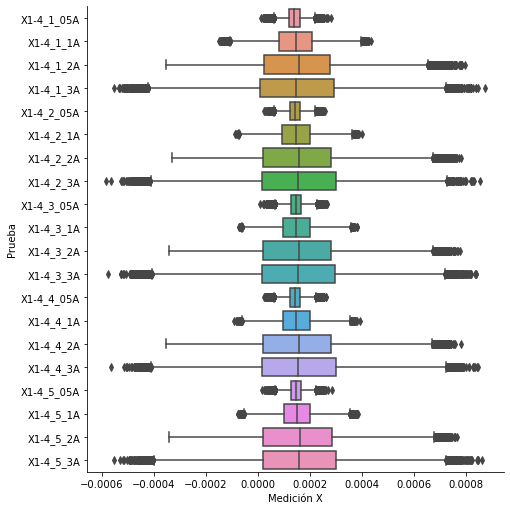

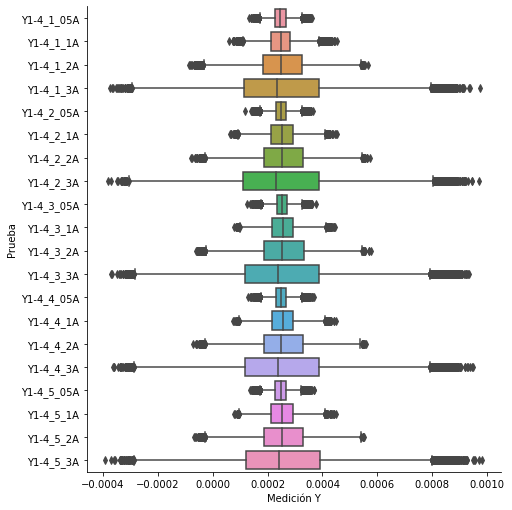

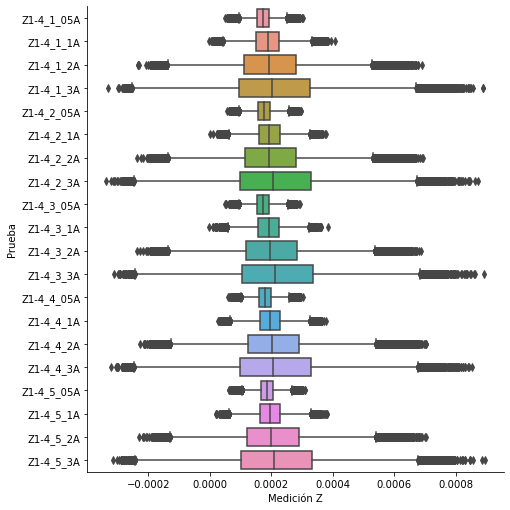

In [16]:
g = sns.catplot(data=basex, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición X", "Prueba")
g = sns.catplot(data=basey, orient="h",kind="box", height = 7)
g.set_axis_labels("Medición Y", "Prueba")
g = sns.catplot(data=basez, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición Z", "Prueba")

# Sensor 2

In [17]:
base_1 = dataframe_chipeado(prueba_1, 4, 7, 2)
base_1

,X2-1_10_05A,Y2-1_10_05A,Z2-1_10_05A,X2-1_10_1A,Y2-1_10_1A,Z2-1_10_1A,X2-1_10_2A,Y2-1_10_2A,Z2-1_10_2A,X2-1_10_3A,...,Z2-1_9_05A,X2-1_9_1A,Y2-1_9_1A,Z2-1_9_1A,X2-1_9_2A,Y2-1_9_2A,Z2-1_9_2A,X2-1_9_3A,Y2-1_9_3A,Z2-1_9_3A
0,0.000146,0.000231,0.000176,0.000086,0.000108,0.000166,-0.000053,0.000046,0.000237,-2.576844e-05,...,0.000211,0.000108,0.000126,0.000211,0.000005,0.000087,0.000183,0.000279,0.000497,0.000317
1,0.000148,0.000194,0.000173,0.000161,0.000197,0.000153,0.000305,0.000333,0.000109,1.754322e-04,...,0.000170,0.000197,0.000166,0.000162,0.000019,0.000117,0.000176,-0.000011,0.000108,0.000133
2,0.000202,0.000195,0.000169,0.000140,0.000161,0.000188,0.000166,0.000164,0.000209,3.241988e-04,...,0.000152,0.000147,0.000168,0.000187,0.000277,0.000076,0.000020,0.000263,0.000160,0.000246
3,0.000158,0.000218,0.000192,0.000047,0.000167,0.000167,-0.000085,0.000039,0.000192,1.358018e-04,...,0.000162,0.000097,0.000190,0.000166,0.000067,0.000178,0.000258,0.000171,0.000155,0.000081
4,0.000178,0.000225,0.000167,0.000204,0.000266,0.000115,0.000269,0.000168,0.000044,-2.393934e-05,...,0.000164,0.000216,0.000271,0.000175,0.000130,0.000287,0.000144,0.000097,0.000188,0.000149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99092,0.000124,0.000183,0.000183,0.000224,0.000302,0.000141,0.000162,0.000235,0.000271,4.129845e-05,...,0.000158,0.000219,0.000266,0.000153,0.000118,0.000181,0.000227,0.000347,0.000536,0.000195
99093,0.000201,0.000208,0.000244,0.000069,0.000130,0.000167,0.000213,0.000311,0.000157,4.486170e-07,...,0.000126,0.000113,0.000164,0.000109,0.000169,0.000101,0.000005,0.000001,0.000152,0.000187
99094,0.000123,0.000184,0.000208,0.000100,0.000169,0.000194,0.000026,0.000160,0.000231,2.607901e-04,...,0.000161,0.000060,0.000148,0.000207,0.000102,0.000250,0.000262,-0.000025,0.000176,0.000098
99095,0.000116,0.000209,0.000205,0.000164,0.000170,0.000170,0.000282,0.000217,0.000234,-3.735272e-05,...,0.000140,0.000213,0.000188,0.000162,0.000102,0.000211,0.000299,0.000433,-0.000047,0.000110


In [18]:
base_1.isnull().sum()

X2-1_10_05A    0
Y2-1_10_05A    0
Z2-1_10_05A    0
X2-1_10_1A     0
Y2-1_10_1A     0
              ..
Y2-1_9_2A      0
Z2-1_9_2A      0
X2-1_9_3A      0
Y2-1_9_3A      0
Z2-1_9_3A      0
Length: 120, dtype: int64

In [19]:
corr_matrix = base_1.corr()
corr_matrix.head()

,X2-1_10_05A,Y2-1_10_05A,Z2-1_10_05A,X2-1_10_1A,Y2-1_10_1A,Z2-1_10_1A,X2-1_10_2A,Y2-1_10_2A,Z2-1_10_2A,X2-1_10_3A,...,Z2-1_9_05A,X2-1_9_1A,Y2-1_9_1A,Z2-1_9_1A,X2-1_9_2A,Y2-1_9_2A,Z2-1_9_2A,X2-1_9_3A,Y2-1_9_3A,Z2-1_9_3A
X2-1_10_05A,1.000000,0.416623,0.389743,0.126553,0.059542,-0.080834,0.000648,-0.035643,-0.100797,-0.060430,...,0.020423,0.104720,0.057535,-0.085014,-0.047100,-0.062331,0.000066,0.037195,0.024454,-0.072817
Y2-1_10_05A,0.416623,1.000000,0.355207,0.000531,0.078149,-0.004290,-0.050987,-0.099811,-0.076336,-0.052547,...,0.017707,-0.042425,0.065142,-0.007369,-0.088043,0.001997,0.003961,-0.060529,0.133078,-0.014780
Z2-1_10_05A,0.389743,0.355207,1.000000,-0.059808,0.004233,0.043273,-0.072732,-0.102811,-0.027338,0.056800,...,0.022546,-0.062503,-0.009128,0.020999,0.025266,-0.031788,-0.082727,-0.039303,-0.001349,0.045179
X2-1_10_1A,0.126553,0.000531,-0.059808,1.000000,0.500537,-0.002148,0.290723,0.176517,-0.253821,-0.361645,...,-0.025059,0.639849,0.271762,-0.315302,-0.017048,-0.152297,0.124141,0.256245,-0.014686,-0.192753
Y2-1_10_1A,0.059542,0.078149,0.004233,0.500537,1.000000,0.341730,0.101490,-0.136992,-0.078604,-0.249167,...,0.019363,0.134446,0.423676,-0.073064,0.048104,0.168149,0.016969,-0.110036,-0.009197,0.062461


In [20]:
basex = base_1.iloc[:,0::3]
basey = base_1.iloc[:,1::3]
basez = base_1.iloc[:,2::3]

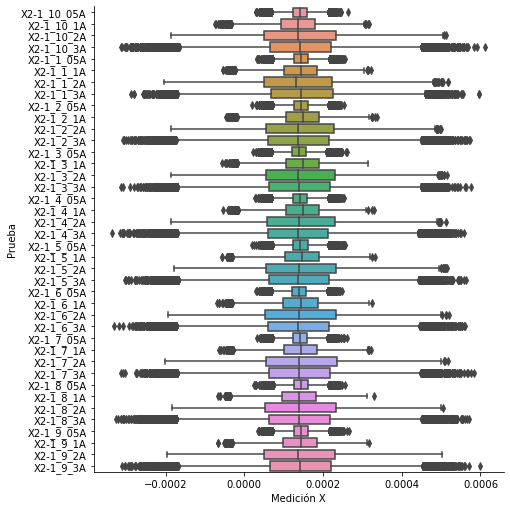

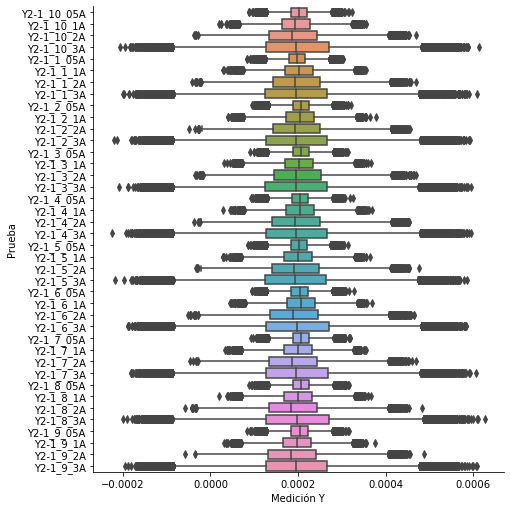

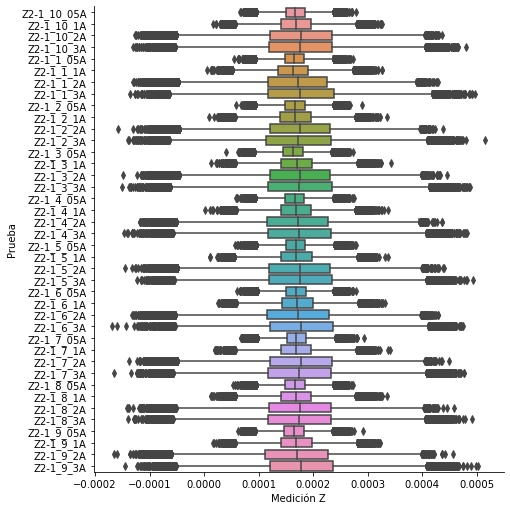

In [21]:
g = sns.catplot(data=basex, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición X", "Prueba")
g = sns.catplot(data=basey, orient="h",kind="box", height = 7)
g.set_axis_labels("Medición Y", "Prueba")
g = sns.catplot(data=basez, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición Z", "Prueba")

### Unlocked Bolt

In [22]:
base_4 = dataframe_chipeado(prueba_4, 4, 7, 2)
base_4.head()

,X2-4_1_05A,Y2-4_1_05A,Z2-4_1_05A,X2-4_1_1A,Y2-4_1_1A,Z2-4_1_1A,X2-4_1_2A,Y2-4_1_2A,Z2-4_1_2A,X2-4_1_3A,...,Z2-4_5_05A,X2-4_5_1A,Y2-4_5_1A,Z2-4_5_1A,X2-4_5_2A,Y2-4_5_2A,Z2-4_5_2A,X2-4_5_3A,Y2-4_5_3A,Z2-4_5_3A
0,0.000135,0.000201,0.000099,0.000177,0.000194,0.000089,0.000122,0.000286,0.000231,0.000195,...,0.000152,0.000051,0.000211,0.000112,0.000132,0.000116,0.000016,-0.000049,0.000283,0.000253
1,0.000180,0.000230,0.000172,0.000119,0.000206,0.000230,0.000246,0.000220,0.000088,0.000053,...,0.000137,0.000263,0.000292,0.000116,-0.000055,0.000080,0.000122,0.000189,0.000359,0.000289
2,0.000153,0.000217,0.000100,0.000234,0.000339,0.000130,0.000088,0.000178,0.000184,0.000157,...,0.000155,0.000094,0.000131,0.000058,0.000147,0.000219,0.000115,0.000347,0.000151,0.000065
3,0.000163,0.000213,0.000120,0.000165,0.000239,0.000137,0.000188,0.000332,0.000220,0.000177,...,0.000131,0.000106,0.000158,0.000155,0.000278,0.000308,0.000078,0.000067,0.000169,0.000226
4,0.000201,0.000202,0.000127,0.000089,0.000173,0.000169,0.000166,0.000185,0.000094,0.000230,...,0.000112,0.000222,0.000205,0.000125,-0.000109,0.000056,0.000142,0.000081,0.000191,0.000069


In [23]:
base_4.isnull().sum()

X2-4_1_05A    0
Y2-4_1_05A    0
Z2-4_1_05A    0
X2-4_1_1A     0
Y2-4_1_1A     0
Z2-4_1_1A     0
X2-4_1_2A     0
Y2-4_1_2A     0
Z2-4_1_2A     0
X2-4_1_3A     0
Y2-4_1_3A     0
Z2-4_1_3A     0
X2-4_2_05A    0
Y2-4_2_05A    0
Z2-4_2_05A    0
X2-4_2_1A     0
Y2-4_2_1A     0
Z2-4_2_1A     0
X2-4_2_2A     0
Y2-4_2_2A     0
Z2-4_2_2A     0
X2-4_2_3A     0
Y2-4_2_3A     0
Z2-4_2_3A     0
X2-4_3_05A    0
Y2-4_3_05A    0
Z2-4_3_05A    0
X2-4_3_1A     0
Y2-4_3_1A     0
Z2-4_3_1A     0
X2-4_3_2A     0
Y2-4_3_2A     0
Z2-4_3_2A     0
X2-4_3_3A     0
Y2-4_3_3A     0
Z2-4_3_3A     0
X2-4_4_05A    0
Y2-4_4_05A    0
Z2-4_4_05A    0
X2-4_4_1A     0
Y2-4_4_1A     0
Z2-4_4_1A     0
X2-4_4_2A     0
Y2-4_4_2A     0
Z2-4_4_2A     0
X2-4_4_3A     0
Y2-4_4_3A     0
Z2-4_4_3A     0
X2-4_5_05A    0
Y2-4_5_05A    0
Z2-4_5_05A    0
X2-4_5_1A     0
Y2-4_5_1A     0
Z2-4_5_1A     0
X2-4_5_2A     0
Y2-4_5_2A     0
Z2-4_5_2A     0
X2-4_5_3A     0
Y2-4_5_3A     0
Z2-4_5_3A     0
dtype: int64

In [24]:
corr_matrix = base_4.corr()
corr_matrix.head()

,X2-4_1_05A,Y2-4_1_05A,Z2-4_1_05A,X2-4_1_1A,Y2-4_1_1A,Z2-4_1_1A,X2-4_1_2A,Y2-4_1_2A,Z2-4_1_2A,X2-4_1_3A,...,Z2-4_5_05A,X2-4_5_1A,Y2-4_5_1A,Z2-4_5_1A,X2-4_5_2A,Y2-4_5_2A,Z2-4_5_2A,X2-4_5_3A,Y2-4_5_3A,Z2-4_5_3A
X2-4_1_05A,1.000000,0.392801,0.391552,0.015197,-0.010716,-0.033926,-0.063438,-0.057188,0.059936,-0.027273,...,0.007282,-0.010209,0.014316,0.036410,0.052158,0.047155,-0.055569,-0.038393,-0.030097,0.049936
Y2-4_1_05A,0.392801,1.000000,0.360715,0.060485,0.004647,-0.045193,0.002179,-0.102788,0.018623,-0.015999,...,0.020610,-0.066990,0.032617,0.035073,0.105901,0.071930,-0.052906,-0.028126,0.011313,0.075434
Z2-4_1_05A,0.391552,0.360715,1.000000,-0.047585,-0.014121,0.045486,0.047195,0.023970,-0.032096,0.000213,...,-0.003504,0.044736,0.010501,-0.026445,-0.059751,-0.036239,0.054486,0.028304,0.034404,-0.043088
X2-4_1_1A,0.015197,0.060485,-0.047585,1.000000,0.605415,-0.094194,-0.210444,0.010243,0.276214,0.175635,...,0.057765,-0.427067,-0.186461,0.256795,0.550125,0.120870,-0.407102,-0.237076,-0.085889,0.277113
Y2-4_1_1A,-0.010716,0.004647,-0.014121,0.605415,1.000000,0.231501,-0.066006,0.128590,0.168930,0.147018,...,0.031892,-0.235019,-0.367661,0.052550,0.374048,0.125127,-0.158511,-0.032862,-0.136657,0.082378


In [25]:
basex = base_4.iloc[:,0::3]
basey = base_4.iloc[:,1::3]
basez = base_4.iloc[:,2::3]

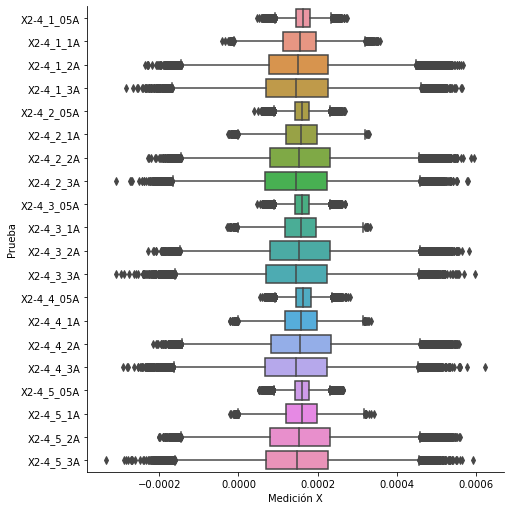

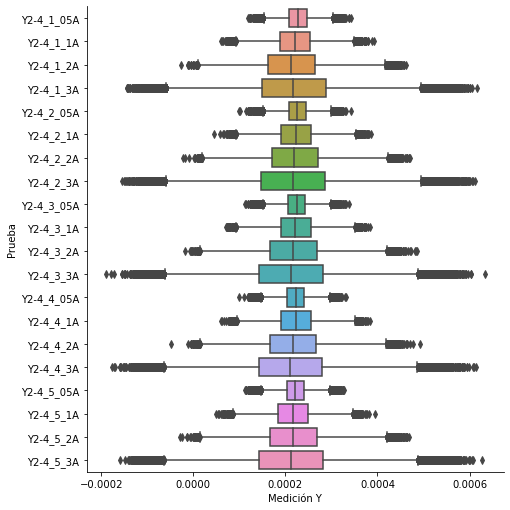

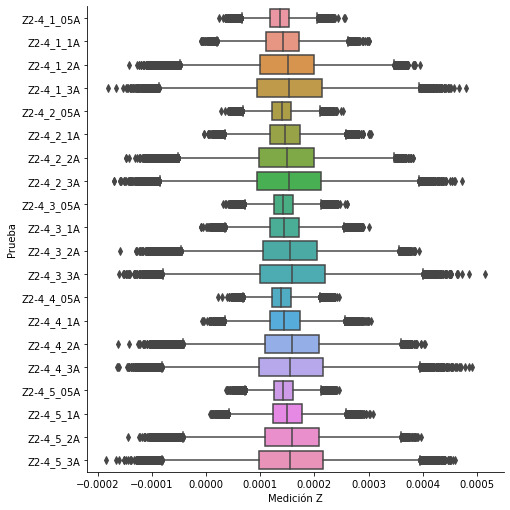

In [26]:
g = sns.catplot(data=basex, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición X", "Prueba")
g = sns.catplot(data=basey, orient="h",kind="box", height = 7)
g.set_axis_labels("Medición Y", "Prueba")
g = sns.catplot(data=basez, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición Z", "Prueba")

# Sensor 3

In [27]:
base_1 = dataframe_chipeado(prueba_1, 7, 10, 3)
base_1

,X3-1_10_05A,Y3-1_10_05A,Z3-1_10_05A,X3-1_10_1A,Y3-1_10_1A,Z3-1_10_1A,X3-1_10_2A,Y3-1_10_2A,Z3-1_10_2A,X3-1_10_3A,...,Z3-1_9_05A,X3-1_9_1A,Y3-1_9_1A,Z3-1_9_1A,X3-1_9_2A,Y3-1_9_2A,Z3-1_9_2A,X3-1_9_3A,Y3-1_9_3A,Z3-1_9_3A
0,0.000063,0.000208,0.000323,0.000081,0.000172,0.000307,0.000172,0.000287,0.000307,0.000045,...,0.000330,0.000085,0.000185,0.000287,0.000009,0.000215,0.000382,0.000079,0.000411,0.000357
1,0.000118,0.000175,0.000318,0.000063,0.000195,0.000336,0.000180,0.000289,0.000340,0.000029,...,0.000303,0.000090,0.000184,0.000335,0.000110,0.000136,0.000305,0.000122,0.000174,0.000299
2,0.000127,0.000208,0.000320,0.000144,0.000211,0.000323,0.000026,0.000176,0.000397,0.000244,...,0.000325,0.000139,0.000203,0.000292,0.000223,0.000165,0.000275,0.000087,0.000153,0.000357
3,0.000154,0.000250,0.000319,0.000173,0.000183,0.000254,0.000083,0.000160,0.000324,0.000009,...,0.000313,0.000176,0.000127,0.000301,0.000066,0.000242,0.000311,0.000091,0.000225,0.000405
4,0.000139,0.000250,0.000345,0.000086,0.000192,0.000354,0.000200,0.000154,0.000264,0.000161,...,0.000317,0.000096,0.000189,0.000340,0.000045,0.000088,0.000306,0.000255,0.000172,0.000251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99092,0.000086,0.000208,0.000299,0.000152,0.000218,0.000338,0.000116,0.000241,0.000324,0.000197,...,0.000336,0.000152,0.000255,0.000312,0.000080,0.000231,0.000318,0.000194,0.000220,0.000382
99093,0.000094,0.000183,0.000303,0.000122,0.000099,0.000334,0.000162,0.000230,0.000313,0.000225,...,0.000304,0.000103,0.000140,0.000337,0.000066,0.000156,0.000393,-0.000011,0.000252,0.000385
99094,0.000094,0.000162,0.000329,0.000094,0.000150,0.000337,0.000085,0.000141,0.000256,0.000048,...,0.000377,0.000071,0.000122,0.000328,0.000172,0.000132,0.000295,0.000184,0.000193,0.000317
99095,0.000118,0.000225,0.000307,0.000133,0.000241,0.000287,0.000031,0.000236,0.000423,0.000085,...,0.000324,0.000151,0.000272,0.000363,0.000211,0.000333,0.000338,0.000038,0.000071,0.000309


In [28]:
base_1.isnull().sum()

X3-1_10_05A    0
Y3-1_10_05A    0
Z3-1_10_05A    0
X3-1_10_1A     0
Y3-1_10_1A     0
              ..
Y3-1_9_2A      0
Z3-1_9_2A      0
X3-1_9_3A      0
Y3-1_9_3A      0
Z3-1_9_3A      0
Length: 120, dtype: int64

In [29]:
corr_matrix = base_1.corr()
corr_matrix.head()

,X3-1_10_05A,Y3-1_10_05A,Z3-1_10_05A,X3-1_10_1A,Y3-1_10_1A,Z3-1_10_1A,X3-1_10_2A,Y3-1_10_2A,Z3-1_10_2A,X3-1_10_3A,...,Z3-1_9_05A,X3-1_9_1A,Y3-1_9_1A,Z3-1_9_1A,X3-1_9_2A,Y3-1_9_2A,Z3-1_9_2A,X3-1_9_3A,Y3-1_9_3A,Z3-1_9_3A
X3-1_10_05A,1.000000,0.274467,-0.032287,0.355729,0.192338,-0.203448,-0.458392,-0.292213,0.311784,-0.132514,...,-0.072794,0.286701,0.138550,-0.175632,0.470266,0.276267,-0.277981,-0.152848,-0.247154,0.120046
Y3-1_10_05A,0.274467,1.000000,0.030151,0.283217,0.143449,-0.197334,-0.209645,-0.244984,0.129735,-0.108703,...,-0.111366,0.287298,0.100566,-0.215388,0.163287,0.180312,-0.180371,-0.072996,-0.065682,0.048407
Z3-1_10_05A,-0.032287,0.030151,1.000000,-0.207039,-0.083088,0.082432,0.263383,0.143399,-0.145563,0.099666,...,0.086384,-0.187573,-0.064709,0.058095,-0.263629,-0.150569,0.172040,0.085612,0.103848,-0.140337
X3-1_10_1A,0.355729,0.283217,-0.207039,1.000000,0.367196,-0.366349,-0.588522,-0.403978,0.334861,-0.001457,...,-0.210715,0.716040,0.295929,-0.421231,0.473694,0.454954,-0.216260,-0.183680,-0.150102,0.172070
Y3-1_10_1A,0.192338,0.143449,-0.083088,0.367196,1.000000,-0.031280,-0.194744,-0.099192,0.277813,-0.003884,...,-0.143750,0.318689,0.700666,-0.129107,0.139122,0.301727,0.016356,0.241423,-0.041304,-0.140452


In [30]:
basex = base_1.iloc[:,0::3]
basey = base_1.iloc[:,1::3]
basez = base_1.iloc[:,2::3]

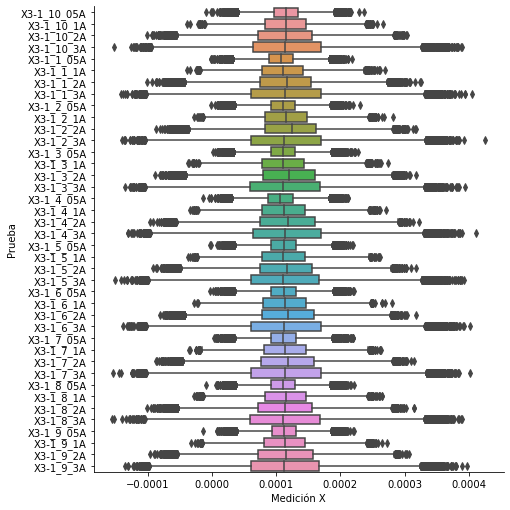

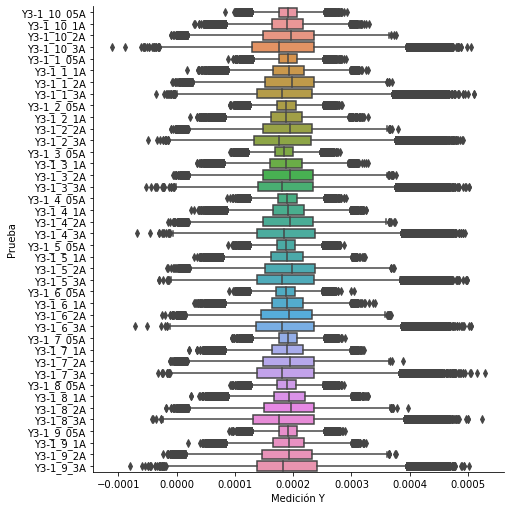

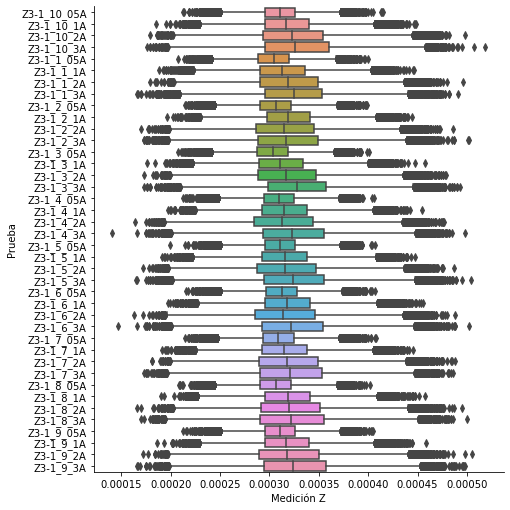

In [31]:
g = sns.catplot(data=basex, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición X", "Prueba")
g = sns.catplot(data=basey, orient="h",kind="box", height = 7)
g.set_axis_labels("Medición Y", "Prueba")
g = sns.catplot(data=basez, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición Z", "Prueba")

### Unlocked Bolt

In [32]:
base_4 = dataframe_chipeado(prueba_4, 7, 10, 3)
base_4.head()

,X3-4_1_05A,Y3-4_1_05A,Z3-4_1_05A,X3-4_1_1A,Y3-4_1_1A,Z3-4_1_1A,X3-4_1_2A,Y3-4_1_2A,Z3-4_1_2A,X3-4_1_3A,...,Z3-4_5_05A,X3-4_5_1A,Y3-4_5_1A,Z3-4_5_1A,X3-4_5_2A,Y3-4_5_2A,Z3-4_5_2A,X3-4_5_3A,Y3-4_5_3A,Z3-4_5_3A
0,0.000108,0.000189,0.000212,0.000034,0.000102,0.000245,0.000013,0.000155,0.000257,0.000105,...,0.000241,0.000136,0.000202,0.000218,0.000095,0.000105,0.000259,0.000107,0.000199,0.000228
1,0.000068,0.000213,0.000214,0.000118,0.000163,0.000310,-0.000002,0.000134,0.000364,0.000058,...,0.000220,0.000085,0.000235,0.000293,0.000089,0.000166,0.000215,0.000121,0.000421,0.000323
2,0.000064,0.000174,0.000225,0.000173,0.000255,0.000253,0.000143,0.000230,0.000241,0.000206,...,0.000240,0.000049,0.000136,0.000303,0.000174,0.000316,0.000271,0.000018,0.000166,0.000338
3,0.000066,0.000157,0.000220,0.000116,0.000207,0.000239,0.000069,0.000193,0.000223,0.000088,...,0.000241,0.000005,0.000132,0.000243,-0.000078,0.000174,0.000245,0.000082,0.000072,0.000329
4,0.000133,0.000197,0.000212,0.000046,0.000102,0.000268,0.000094,0.000193,0.000294,0.000125,...,0.000202,0.000118,0.000191,0.000271,0.000049,0.000175,0.000272,0.000178,0.000252,0.000245


In [33]:
base_4.isnull().sum()

X3-4_1_05A    0
Y3-4_1_05A    0
Z3-4_1_05A    0
X3-4_1_1A     0
Y3-4_1_1A     0
Z3-4_1_1A     0
X3-4_1_2A     0
Y3-4_1_2A     0
Z3-4_1_2A     0
X3-4_1_3A     0
Y3-4_1_3A     0
Z3-4_1_3A     0
X3-4_2_05A    0
Y3-4_2_05A    0
Z3-4_2_05A    0
X3-4_2_1A     0
Y3-4_2_1A     0
Z3-4_2_1A     0
X3-4_2_2A     0
Y3-4_2_2A     0
Z3-4_2_2A     0
X3-4_2_3A     0
Y3-4_2_3A     0
Z3-4_2_3A     0
X3-4_3_05A    0
Y3-4_3_05A    0
Z3-4_3_05A    0
X3-4_3_1A     0
Y3-4_3_1A     0
Z3-4_3_1A     0
X3-4_3_2A     0
Y3-4_3_2A     0
Z3-4_3_2A     0
X3-4_3_3A     0
Y3-4_3_3A     0
Z3-4_3_3A     0
X3-4_4_05A    0
Y3-4_4_05A    0
Z3-4_4_05A    0
X3-4_4_1A     0
Y3-4_4_1A     0
Z3-4_4_1A     0
X3-4_4_2A     0
Y3-4_4_2A     0
Z3-4_4_2A     0
X3-4_4_3A     0
Y3-4_4_3A     0
Z3-4_4_3A     0
X3-4_5_05A    0
Y3-4_5_05A    0
Z3-4_5_05A    0
X3-4_5_1A     0
Y3-4_5_1A     0
Z3-4_5_1A     0
X3-4_5_2A     0
Y3-4_5_2A     0
Z3-4_5_2A     0
X3-4_5_3A     0
Y3-4_5_3A     0
Z3-4_5_3A     0
dtype: int64

In [34]:
corr_matrix = base_4.corr()
corr_matrix.head()

,X3-4_1_05A,Y3-4_1_05A,Z3-4_1_05A,X3-4_1_1A,Y3-4_1_1A,Z3-4_1_1A,X3-4_1_2A,Y3-4_1_2A,Z3-4_1_2A,X3-4_1_3A,...,Z3-4_5_05A,X3-4_5_1A,Y3-4_5_1A,Z3-4_5_1A,X3-4_5_2A,Y3-4_5_2A,Z3-4_5_2A,X3-4_5_3A,Y3-4_5_3A,Z3-4_5_3A
X3-4_1_05A,1.000000,0.303189,-0.066209,-0.484214,-0.338942,0.324517,-0.383850,-0.174575,0.208532,-0.369708,...,-0.064827,0.373812,0.232432,-0.301445,-0.182062,-0.415300,0.113488,0.267976,0.205532,-0.261254
Y3-4_1_05A,0.303189,1.000000,0.008007,-0.325504,-0.208266,0.237420,-0.319960,-0.220692,0.250724,-0.202909,...,-0.119066,0.350790,0.191798,-0.289959,0.104048,-0.063879,-0.030212,0.288001,0.194132,-0.219437
Z3-4_1_05A,-0.066209,0.008007,1.000000,0.258529,0.179222,-0.192025,0.212294,0.080575,-0.115736,0.206940,...,0.038768,-0.206938,-0.132779,0.207983,0.108304,0.206173,-0.023087,-0.164499,-0.122289,0.119543
X3-4_1_1A,-0.484214,-0.325504,0.258529,1.000000,0.416498,-0.450041,0.448538,0.204064,-0.396639,0.419470,...,0.117871,-0.619987,-0.226360,0.526651,0.121338,0.451009,-0.155770,-0.534354,-0.233847,0.445024
Y3-4_1_1A,-0.338942,-0.208266,0.179222,0.416498,1.000000,-0.160588,0.461128,0.467087,-0.369091,0.241271,...,0.195668,-0.411796,-0.618201,0.219694,-0.084187,0.245515,0.224092,-0.207677,-0.388226,0.238959


In [35]:
basex = base_4.iloc[:,0::3]
basey = base_4.iloc[:,1::3]
basez = base_4.iloc[:,2::3]

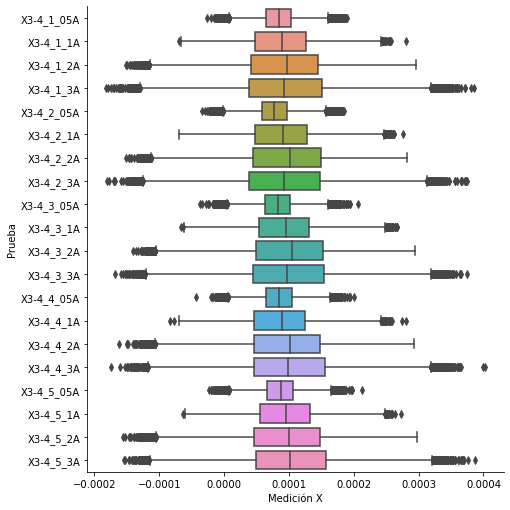

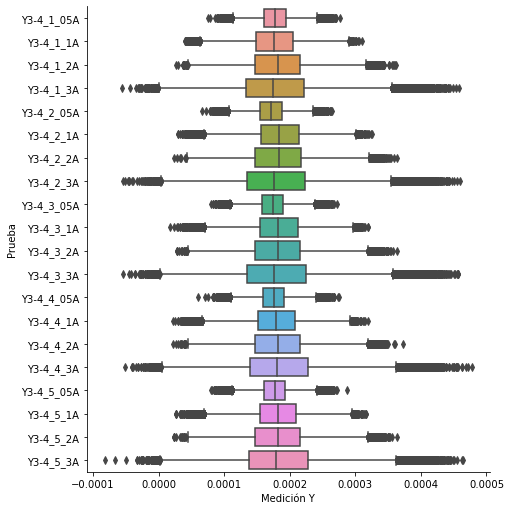

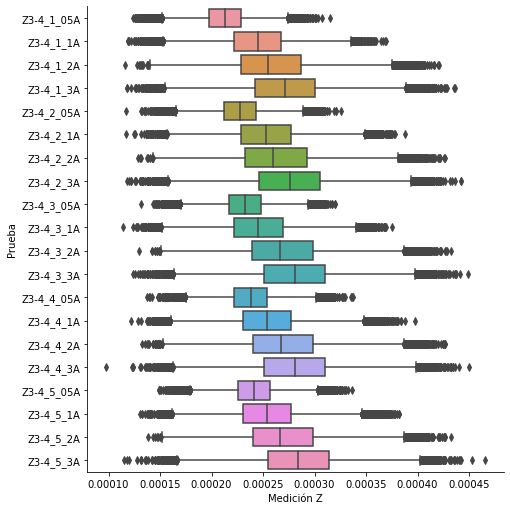

In [36]:
g = sns.catplot(data=basex, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición X", "Prueba")
g = sns.catplot(data=basey, orient="h",kind="box", height = 7)
g.set_axis_labels("Medición Y", "Prueba")
g = sns.catplot(data=basez, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición Z", "Prueba")

# Sensor 4

In [37]:
base_1 = dataframe_chipeado(prueba_1, 10, 13, 4)
base_1

,X4-1_10_05A,Y4-1_10_05A,Z4-1_10_05A,X4-1_10_1A,Y4-1_10_1A,Z4-1_10_1A,X4-1_10_2A,Y4-1_10_2A,Z4-1_10_2A,X4-1_10_3A,...,Z4-1_9_05A,X4-1_9_1A,Y4-1_9_1A,Z4-1_9_1A,X4-1_9_2A,Y4-1_9_2A,Z4-1_9_2A,X4-1_9_3A,Y4-1_9_3A,Z4-1_9_3A
0,0.000154,0.000265,0.000244,0.000207,0.000259,0.000280,0.000166,0.000272,0.000168,0.000211,...,0.000280,0.000151,0.000254,0.000253,0.000226,0.000210,0.000211,0.000141,0.000271,0.000270
1,0.000143,0.000289,0.000248,0.000166,0.000264,0.000273,0.000023,0.000358,0.000270,0.000110,...,0.000258,0.000208,0.000264,0.000248,0.000149,0.000323,0.000309,0.000069,0.000431,0.000219
2,0.000144,0.000245,0.000248,0.000122,0.000295,0.000275,0.000238,0.000233,0.000320,0.000066,...,0.000266,0.000106,0.000286,0.000264,0.000119,0.000226,0.000289,0.000262,0.000156,0.000358
3,0.000093,0.000267,0.000236,0.000140,0.000330,0.000236,0.000183,0.000298,0.000242,0.000115,...,0.000259,0.000149,0.000309,0.000211,0.000123,0.000276,0.000209,0.000165,0.000312,0.000224
4,0.000229,0.000280,0.000252,0.000094,0.000258,0.000252,0.000137,0.000277,0.000289,0.000293,...,0.000277,0.000140,0.000256,0.000300,0.000090,0.000297,0.000322,-0.000060,0.000275,0.000280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99092,0.000132,0.000284,0.000231,0.000076,0.000272,0.000259,0.000300,0.000154,0.000216,0.000027,...,0.000250,0.000122,0.000289,0.000270,0.000096,0.000233,0.000265,0.000244,0.000258,0.000275
99093,0.000149,0.000286,0.000211,0.000107,0.000275,0.000225,0.000055,0.000344,0.000237,0.000148,...,0.000230,0.000118,0.000277,0.000274,0.000208,0.000250,0.000241,0.000193,0.000303,0.000161
99094,0.000188,0.000285,0.000236,0.000201,0.000222,0.000272,0.000051,0.000298,0.000297,0.000213,...,0.000259,0.000190,0.000237,0.000241,0.000169,0.000242,0.000319,-0.000108,0.000159,0.000364
99095,0.000103,0.000287,0.000250,0.000169,0.000269,0.000252,0.000204,0.000257,0.000215,0.000012,...,0.000289,0.000157,0.000266,0.000245,0.000105,0.000348,0.000226,0.000241,0.000397,0.000226


In [38]:
base_1.isnull().sum()

X4-1_10_05A    0
Y4-1_10_05A    0
Z4-1_10_05A    0
X4-1_10_1A     0
Y4-1_10_1A     0
              ..
Y4-1_9_2A      0
Z4-1_9_2A      0
X4-1_9_3A      0
Y4-1_9_3A      0
Z4-1_9_3A      0
Length: 120, dtype: int64

In [39]:
corr_matrix = base_1.corr()
corr_matrix.head()

,X4-1_10_05A,Y4-1_10_05A,Z4-1_10_05A,X4-1_10_1A,Y4-1_10_1A,Z4-1_10_1A,X4-1_10_2A,Y4-1_10_2A,Z4-1_10_2A,X4-1_10_3A,...,Z4-1_9_05A,X4-1_9_1A,Y4-1_9_1A,Z4-1_9_1A,X4-1_9_2A,Y4-1_9_2A,Z4-1_9_2A,X4-1_9_3A,Y4-1_9_3A,Z4-1_9_3A
X4-1_10_05A,1.000000,0.013644,0.149288,0.231200,-0.048023,0.114714,-0.306454,0.064462,-0.004660,-0.092843,...,0.073259,0.142534,-0.022097,0.154757,0.365968,-0.083370,-0.004961,0.015318,-0.131836,-0.011505
Y4-1_10_05A,0.013644,1.000000,0.142678,-0.099823,0.006598,-0.026261,0.144495,-0.071766,0.045406,-0.035772,...,-0.007787,-0.065716,-0.018349,-0.037605,-0.180252,0.089397,0.048761,-0.030814,0.132483,0.094410
Z4-1_10_05A,0.149288,0.142678,1.000000,-0.005704,-0.037397,0.015852,-0.008911,0.004586,-0.019657,-0.035903,...,0.026356,-0.011805,-0.046840,0.004203,0.011399,-0.014299,0.019569,-0.061175,0.067482,0.024491
X4-1_10_1A,0.231200,-0.099823,-0.005704,1.000000,-0.316915,-0.078163,-0.355270,-0.047406,-0.061981,0.242834,...,0.093059,0.757888,-0.312619,-0.065019,0.574976,-0.359648,-0.263603,-0.103092,-0.140709,0.064190
Y4-1_10_1A,-0.048023,0.006598,-0.037397,-0.316915,1.000000,0.153563,0.043982,0.153436,0.123644,-0.077547,...,-0.054807,-0.349700,0.488600,0.026161,-0.264474,0.241922,-0.010257,0.244088,-0.122036,-0.097582


In [40]:
basex = base_1.iloc[:,0::3]
basey = base_1.iloc[:,1::3]
basez = base_1.iloc[:,2::3]

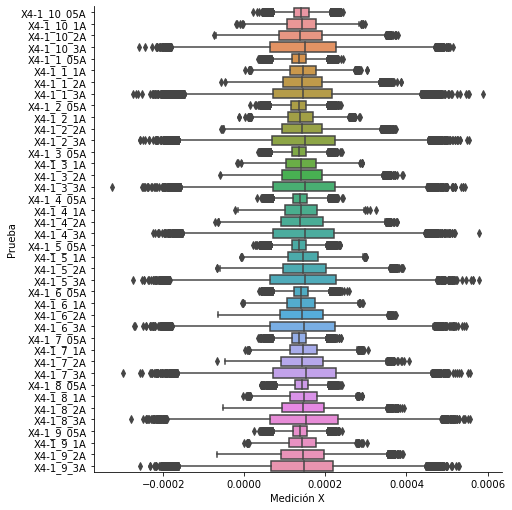

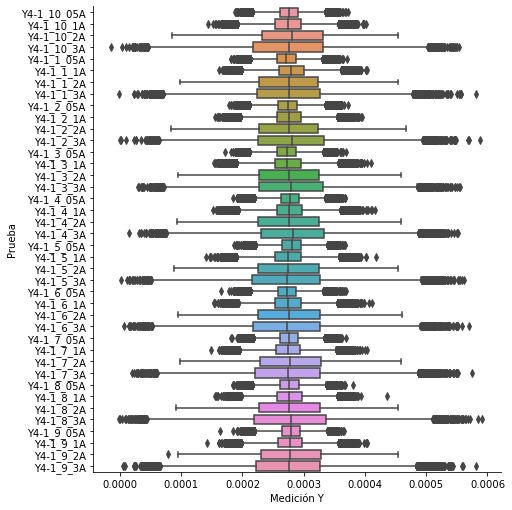

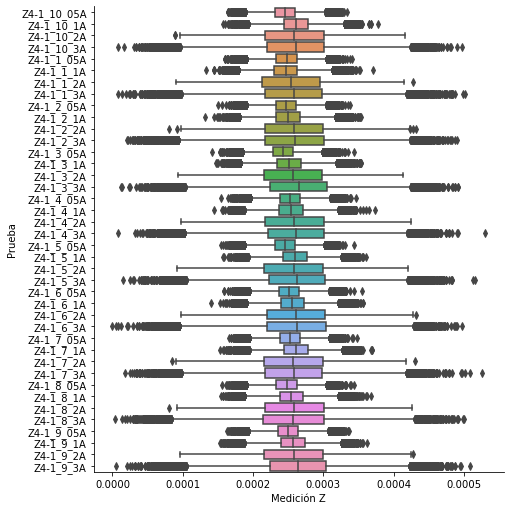

In [41]:
g = sns.catplot(data=basex, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición X", "Prueba")
g = sns.catplot(data=basey, orient="h",kind="box", height = 7)
g.set_axis_labels("Medición Y", "Prueba")
g = sns.catplot(data=basez, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición Z", "Prueba")

### Unlocked Bolt

In [42]:
base_4 = dataframe_chipeado(prueba_4, 10, 13, 4)
base_4.head()

,X4-4_1_05A,Y4-4_1_05A,Z4-4_1_05A,X4-4_1_1A,Y4-4_1_1A,Z4-4_1_1A,X4-4_1_2A,Y4-4_1_2A,Z4-4_1_2A,X4-4_1_3A,...,Z4-4_5_05A,X4-4_5_1A,Y4-4_5_1A,Z4-4_5_1A,X4-4_5_2A,Y4-4_5_2A,Z4-4_5_2A,X4-4_5_3A,Y4-4_5_3A,Z4-4_5_3A
0,0.000093,0.000257,0.000196,0.000168,0.000284,0.000284,-0.000042,0.000355,0.000220,-0.000143,...,0.000181,0.000062,0.000226,0.000208,-0.000025,0.000340,0.000233,3.413231e-04,0.000127,0.000275
1,0.000095,0.000272,0.000172,0.000204,0.000300,0.000205,0.000328,0.000167,0.000216,0.000290,...,0.000195,0.000080,0.000257,0.000194,0.000276,0.000182,0.000293,-7.984071e-05,0.000454,0.000114
2,0.000116,0.000245,0.000202,0.000111,0.000317,0.000254,-0.000027,0.000381,0.000161,0.000246,...,0.000214,0.000003,0.000308,0.000163,-0.000103,0.000376,0.000100,2.657452e-04,0.000122,0.000298
3,0.000096,0.000229,0.000203,0.000052,0.000293,0.000161,0.000284,0.000189,0.000306,-0.000142,...,0.000145,0.000218,0.000209,0.000262,0.000278,0.000158,0.000323,1.225130e-04,0.000322,0.000186
4,0.000110,0.000266,0.000199,0.000079,0.000269,0.000171,-0.000060,0.000325,0.000100,0.000313,...,0.000241,0.000025,0.000244,0.000179,0.000034,0.000323,0.000158,6.131560e-07,0.000294,0.000284


In [43]:
base_4.isnull().sum()

X4-4_1_05A    0
Y4-4_1_05A    0
Z4-4_1_05A    0
X4-4_1_1A     0
Y4-4_1_1A     0
Z4-4_1_1A     0
X4-4_1_2A     0
Y4-4_1_2A     0
Z4-4_1_2A     0
X4-4_1_3A     0
Y4-4_1_3A     0
Z4-4_1_3A     0
X4-4_2_05A    0
Y4-4_2_05A    0
Z4-4_2_05A    0
X4-4_2_1A     0
Y4-4_2_1A     0
Z4-4_2_1A     0
X4-4_2_2A     0
Y4-4_2_2A     0
Z4-4_2_2A     0
X4-4_2_3A     0
Y4-4_2_3A     0
Z4-4_2_3A     0
X4-4_3_05A    0
Y4-4_3_05A    0
Z4-4_3_05A    0
X4-4_3_1A     0
Y4-4_3_1A     0
Z4-4_3_1A     0
X4-4_3_2A     0
Y4-4_3_2A     0
Z4-4_3_2A     0
X4-4_3_3A     0
Y4-4_3_3A     0
Z4-4_3_3A     0
X4-4_4_05A    0
Y4-4_4_05A    0
Z4-4_4_05A    0
X4-4_4_1A     0
Y4-4_4_1A     0
Z4-4_4_1A     0
X4-4_4_2A     0
Y4-4_4_2A     0
Z4-4_4_2A     0
X4-4_4_3A     0
Y4-4_4_3A     0
Z4-4_4_3A     0
X4-4_5_05A    0
Y4-4_5_05A    0
Z4-4_5_05A    0
X4-4_5_1A     0
Y4-4_5_1A     0
Z4-4_5_1A     0
X4-4_5_2A     0
Y4-4_5_2A     0
Z4-4_5_2A     0
X4-4_5_3A     0
Y4-4_5_3A     0
Z4-4_5_3A     0
dtype: int64

In [44]:
corr_matrix = base_4.corr()
corr_matrix.head()

,X4-4_1_05A,Y4-4_1_05A,Z4-4_1_05A,X4-4_1_1A,Y4-4_1_1A,Z4-4_1_1A,X4-4_1_2A,Y4-4_1_2A,Z4-4_1_2A,X4-4_1_3A,...,Z4-4_5_05A,X4-4_5_1A,Y4-4_5_1A,Z4-4_5_1A,X4-4_5_2A,Y4-4_5_2A,Z4-4_5_2A,X4-4_5_3A,Y4-4_5_3A,Z4-4_5_3A
X4-4_1_05A,1.000000,0.082681,0.205218,-0.052905,0.048797,-0.136180,0.063054,-0.073182,0.110313,-0.225842,...,0.048650,0.198430,-0.214060,0.259428,0.094289,-0.141446,0.210125,0.083642,-0.075638,0.108456
Y4-4_1_05A,0.082681,1.000000,0.123298,0.014171,0.008669,0.038501,-0.056615,0.046268,-0.075854,0.102789,...,0.010662,-0.097554,0.105016,-0.128440,-0.032181,0.046746,-0.099398,-0.085830,0.050560,-0.059888
Z4-4_1_05A,0.205218,0.123298,1.000000,-0.106022,0.050750,-0.071988,0.020337,-0.008118,0.002290,-0.020832,...,0.002608,0.072755,-0.059727,0.058929,0.003233,-0.026808,0.005409,0.022965,-0.002809,0.016733
X4-4_1_1A,-0.052905,0.014171,-0.106022,1.000000,-0.181401,0.438407,-0.116010,0.125601,0.200358,-0.270810,...,-0.057218,-0.269265,0.042313,0.121129,-0.169570,0.233316,0.106267,0.129633,-0.281929,0.201531
Y4-4_1_1A,0.048797,0.008669,0.050750,-0.181401,1.000000,-0.225035,0.113915,-0.083600,-0.092120,0.172981,...,0.016016,0.019831,-0.060957,-0.065138,0.076541,-0.125451,-0.113079,-0.241141,0.156222,-0.113793


In [45]:
basex = base_4.iloc[:,0::3]
basey = base_4.iloc[:,1::3]
basez = base_4.iloc[:,2::3]

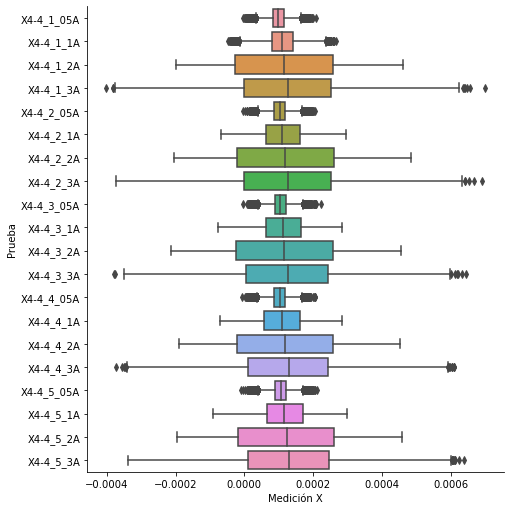

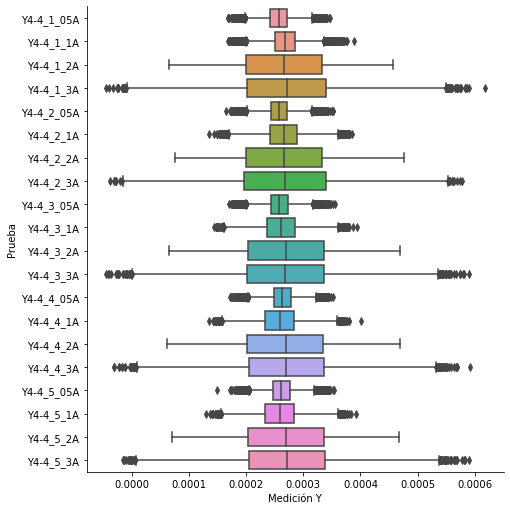

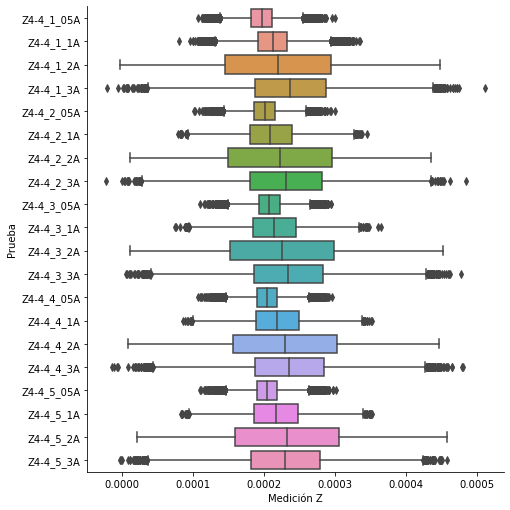

In [46]:
g = sns.catplot(data=basex, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición X", "Prueba")
g = sns.catplot(data=basey, orient="h",kind="box", height = 7)
g.set_axis_labels("Medición Y", "Prueba")
g = sns.catplot(data=basez, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición Z", "Prueba")

# Sensor 5

In [47]:
base_1 = dataframe_chipeado(prueba_1, 13, 16, 5)
base_1

,X5-1_10_05A,Y5-1_10_05A,Z5-1_10_05A,X5-1_10_1A,Y5-1_10_1A,Z5-1_10_1A,X5-1_10_2A,Y5-1_10_2A,Z5-1_10_2A,X5-1_10_3A,...,Z5-1_9_05A,X5-1_9_1A,Y5-1_9_1A,Z5-1_9_1A,X5-1_9_2A,Y5-1_9_2A,Z5-1_9_2A,X5-1_9_3A,Y5-1_9_3A,Z5-1_9_3A
0,0.000154,0.000076,0.000395,0.000165,0.000009,0.000369,0.000101,-5.591913e-05,0.000344,0.000006,...,0.000405,0.000193,0.000028,0.000345,0.000121,0.000011,0.000373,-0.000016,0.000022,0.000436
1,0.000192,0.000076,0.000399,0.000174,0.000065,0.000436,0.000248,5.143841e-05,0.000433,0.000219,...,0.000374,0.000138,0.000038,0.000411,0.000159,0.000058,0.000377,0.000362,0.000054,0.000331
2,0.000140,0.000028,0.000396,0.000109,0.000029,0.000362,0.000192,4.716851e-05,0.000375,0.000116,...,0.000410,0.000129,0.000001,0.000356,0.000176,0.000025,0.000333,0.000317,0.000007,0.000416
3,0.000200,0.000086,0.000370,0.000193,0.000027,0.000381,0.000125,-4.104020e-07,0.000390,0.000229,...,0.000372,0.000184,0.000040,0.000408,0.000099,-0.000007,0.000409,-0.000083,0.000075,0.000450
4,0.000207,0.000067,0.000389,0.000154,0.000079,0.000360,0.000206,1.112170e-04,0.000315,0.000036,...,0.000383,0.000177,0.000054,0.000380,0.000242,0.000146,0.000389,0.000160,0.000137,0.000390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99092,0.000195,0.000029,0.000330,0.000167,0.000087,0.000404,0.000167,-7.120248e-06,0.000411,0.000103,...,0.000373,0.000131,0.000034,0.000392,0.000195,0.000031,0.000381,0.000313,-0.000020,0.000419
99093,0.000201,0.000087,0.000394,0.000234,0.000042,0.000393,0.000119,5.997821e-05,0.000416,0.000145,...,0.000369,0.000237,0.000045,0.000406,0.000226,0.000011,0.000425,0.000063,0.000047,0.000320
99094,0.000162,0.000050,0.000333,0.000154,0.000051,0.000437,0.000142,7.827779e-05,0.000364,0.000127,...,0.000371,0.000187,0.000037,0.000370,0.000161,0.000102,0.000378,0.000184,0.000060,0.000432
99095,0.000215,0.000032,0.000378,0.000085,0.000028,0.000402,0.000196,2.276907e-05,0.000459,0.000170,...,0.000391,0.000120,0.000023,0.000420,0.000117,-0.000053,0.000375,0.000278,-0.000001,0.000356


In [48]:
base_1.isnull().sum()

X5-1_10_05A    0
Y5-1_10_05A    0
Z5-1_10_05A    0
X5-1_10_1A     0
Y5-1_10_1A     0
              ..
Y5-1_9_2A      0
Z5-1_9_2A      0
X5-1_9_3A      0
Y5-1_9_3A      0
Z5-1_9_3A      0
Length: 120, dtype: int64

In [49]:
corr_matrix = base_1.corr()
corr_matrix.head()

,X5-1_10_05A,Y5-1_10_05A,Z5-1_10_05A,X5-1_10_1A,Y5-1_10_1A,Z5-1_10_1A,X5-1_10_2A,Y5-1_10_2A,Z5-1_10_2A,X5-1_10_3A,...,Z5-1_9_05A,X5-1_9_1A,Y5-1_9_1A,Z5-1_9_1A,X5-1_9_2A,Y5-1_9_2A,Z5-1_9_2A,X5-1_9_3A,Y5-1_9_3A,Z5-1_9_3A
X5-1_10_05A,1.000000,0.155108,0.192313,0.028565,0.014807,0.121347,-0.171592,-0.026798,-0.065098,0.072512,...,0.031401,-0.029715,0.025654,0.133134,0.220560,-0.050123,0.080290,0.150256,-0.130314,-0.134552
Y5-1_10_05A,0.155108,1.000000,0.179647,0.017596,0.012898,-0.009040,-0.007514,0.001551,-0.012911,-0.024710,...,-0.002187,0.040551,-0.004111,-0.007296,-0.009690,0.006652,0.033331,-0.045302,0.024351,0.004022
Z5-1_10_05A,0.192313,0.179647,1.000000,0.068427,0.011489,0.054391,-0.080548,-0.010294,-0.008917,-0.030125,...,0.016335,0.085793,-0.014974,0.076025,0.000856,-0.044062,0.113339,-0.089057,-0.004852,-0.024834
X5-1_10_1A,0.028565,0.017596,0.068427,1.000000,0.042064,0.205230,-0.416673,0.042738,-0.081717,0.279557,...,0.084701,0.674586,-0.042611,0.098441,0.173974,-0.006275,0.125985,-0.348885,0.135271,0.104459
Y5-1_10_1A,0.014807,0.012898,0.011489,0.042064,1.000000,-0.017831,0.259155,0.467337,-0.192547,0.034624,...,-0.064996,-0.053835,0.281792,-0.128844,0.214139,0.431293,-0.019300,0.069706,0.333370,-0.031474


In [50]:
basex = base_1.iloc[:,0::3]
basey = base_1.iloc[:,1::3]
basez = base_1.iloc[:,2::3]

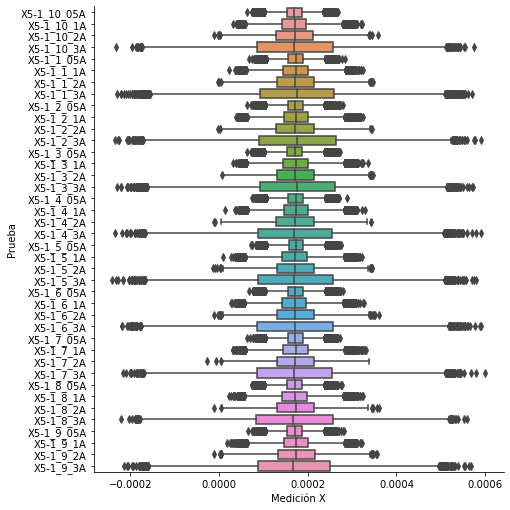

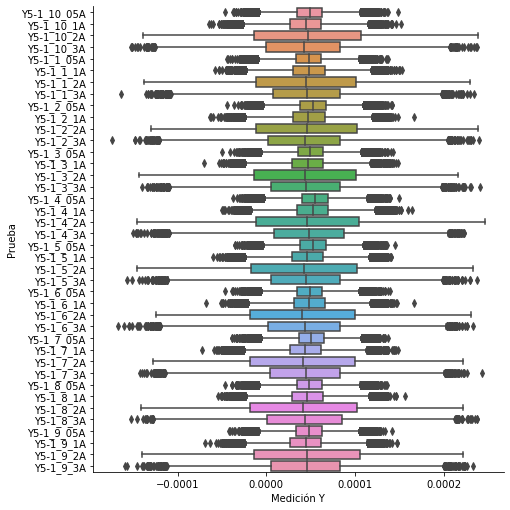

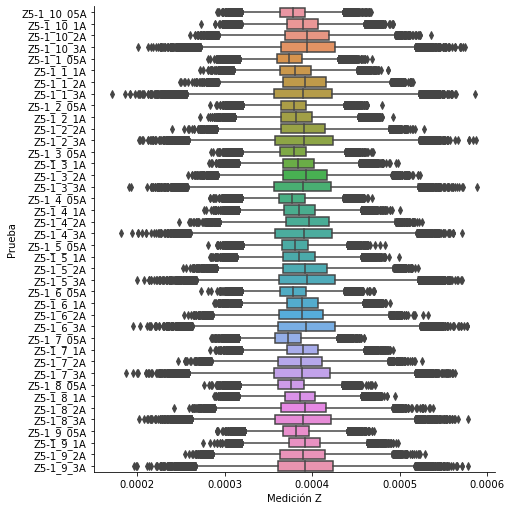

In [51]:
g = sns.catplot(data=basex, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición X", "Prueba")
g = sns.catplot(data=basey, orient="h",kind="box", height = 7)
g.set_axis_labels("Medición Y", "Prueba")
g = sns.catplot(data=basez, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición Z", "Prueba")

### Unlocked Bolt

In [52]:
base_4 = dataframe_chipeado(prueba_4, 13, 16, 5)
base_4.head()

,X5-4_1_05A,Y5-4_1_05A,Z5-4_1_05A,X5-4_1_1A,Y5-4_1_1A,Z5-4_1_1A,X5-4_1_2A,Y5-4_1_2A,Z5-4_1_2A,X5-4_1_3A,...,Z5-4_5_05A,X5-4_5_1A,Y5-4_5_1A,Z5-4_5_1A,X5-4_5_2A,Y5-4_5_2A,Z5-4_5_2A,X5-4_5_3A,Y5-4_5_3A,Z5-4_5_3A
0,0.000173,0.000029,0.000316,0.000218,0.000051,0.000309,0.000134,0.000086,0.000376,-0.000029,...,0.000316,0.000126,0.000042,0.000343,0.000181,6.363813e-05,0.000365,0.000203,0.000072,0.000355
1,0.000173,0.000050,0.000292,0.000230,0.000061,0.000355,0.000276,0.000063,0.000297,0.000214,...,0.000299,0.000118,0.000084,0.000312,0.000154,-3.334965e-05,0.000232,0.000078,0.000028,0.000369
2,0.000140,0.000012,0.000309,0.000148,0.000056,0.000336,0.000117,0.000058,0.000401,0.000378,...,0.000277,0.000196,0.000011,0.000382,0.000093,7.522786e-05,0.000414,0.000260,0.000044,0.000369
3,0.000157,0.000057,0.000292,0.000167,0.000073,0.000357,0.000191,0.000019,0.000259,0.000037,...,0.000334,0.000205,0.000031,0.000311,0.000198,-4.104020e-07,0.000265,0.000212,0.000054,0.000375
4,0.000181,0.000040,0.000336,0.000211,0.000072,0.000342,0.000085,0.000069,0.000395,0.000087,...,0.000322,0.000055,0.000020,0.000339,0.000104,1.910915e-05,0.000415,0.000058,0.000047,0.000315


In [53]:
base_4.isnull().sum()

X5-4_1_05A    0
Y5-4_1_05A    0
Z5-4_1_05A    0
X5-4_1_1A     0
Y5-4_1_1A     0
Z5-4_1_1A     0
X5-4_1_2A     0
Y5-4_1_2A     0
Z5-4_1_2A     0
X5-4_1_3A     0
Y5-4_1_3A     0
Z5-4_1_3A     0
X5-4_2_05A    0
Y5-4_2_05A    0
Z5-4_2_05A    0
X5-4_2_1A     0
Y5-4_2_1A     0
Z5-4_2_1A     0
X5-4_2_2A     0
Y5-4_2_2A     0
Z5-4_2_2A     0
X5-4_2_3A     0
Y5-4_2_3A     0
Z5-4_2_3A     0
X5-4_3_05A    0
Y5-4_3_05A    0
Z5-4_3_05A    0
X5-4_3_1A     0
Y5-4_3_1A     0
Z5-4_3_1A     0
X5-4_3_2A     0
Y5-4_3_2A     0
Z5-4_3_2A     0
X5-4_3_3A     0
Y5-4_3_3A     0
Z5-4_3_3A     0
X5-4_4_05A    0
Y5-4_4_05A    0
Z5-4_4_05A    0
X5-4_4_1A     0
Y5-4_4_1A     0
Z5-4_4_1A     0
X5-4_4_2A     0
Y5-4_4_2A     0
Z5-4_4_2A     0
X5-4_4_3A     0
Y5-4_4_3A     0
Z5-4_4_3A     0
X5-4_5_05A    0
Y5-4_5_05A    0
Z5-4_5_05A    0
X5-4_5_1A     0
Y5-4_5_1A     0
Z5-4_5_1A     0
X5-4_5_2A     0
Y5-4_5_2A     0
Z5-4_5_2A     0
X5-4_5_3A     0
Y5-4_5_3A     0
Z5-4_5_3A     0
dtype: int64

In [54]:
corr_matrix = base_4.corr()
corr_matrix.head()

,X5-4_1_05A,Y5-4_1_05A,Z5-4_1_05A,X5-4_1_1A,Y5-4_1_1A,Z5-4_1_1A,X5-4_1_2A,Y5-4_1_2A,Z5-4_1_2A,X5-4_1_3A,...,Z5-4_5_05A,X5-4_5_1A,Y5-4_5_1A,Z5-4_5_1A,X5-4_5_2A,Y5-4_5_2A,Z5-4_5_2A,X5-4_5_3A,Y5-4_5_3A,Z5-4_5_3A
X5-4_1_05A,1.000000,0.167017,0.258763,0.010260,-0.065368,-0.184686,-0.177432,0.056330,-0.152200,-0.254072,...,0.047053,0.007208,0.048798,0.063427,-0.078829,0.067793,-0.051212,-0.096067,0.091041,0.160312
Y5-4_1_05A,0.167017,1.000000,0.183170,-0.051411,0.033773,-0.038530,0.006188,0.014857,0.013293,0.031833,...,-0.009251,0.051846,0.001970,-0.003586,-0.019186,-0.000759,0.014835,0.044790,-0.034255,0.012043
Z5-4_1_05A,0.258763,0.183170,1.000000,-0.132498,-0.041788,-0.105728,-0.060586,0.013092,-0.053482,-0.052596,...,0.005569,0.103747,0.006991,0.048527,-0.036986,0.035595,-0.030793,0.075933,-0.016984,0.042525
X5-4_1_1A,0.010260,-0.051411,-0.132498,1.000000,0.047992,0.225906,0.102045,0.137123,0.119619,-0.060855,...,-0.035592,-0.602868,0.033738,-0.149123,-0.103880,0.069074,0.036399,-0.502048,0.246312,-0.060306
Y5-4_1_1A,-0.065368,0.033773,-0.041788,0.047992,1.000000,0.166791,-0.015134,-0.058489,0.030911,0.091492,...,0.038724,0.118918,-0.010159,0.044903,0.043834,-0.115280,0.097242,0.038577,-0.040186,0.043058


In [55]:
basex = base_4.iloc[:,0::3]
basey = base_4.iloc[:,1::3]
basez = base_4.iloc[:,2::3]

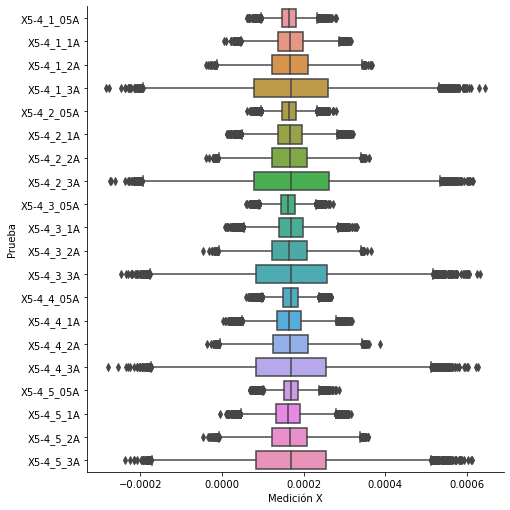

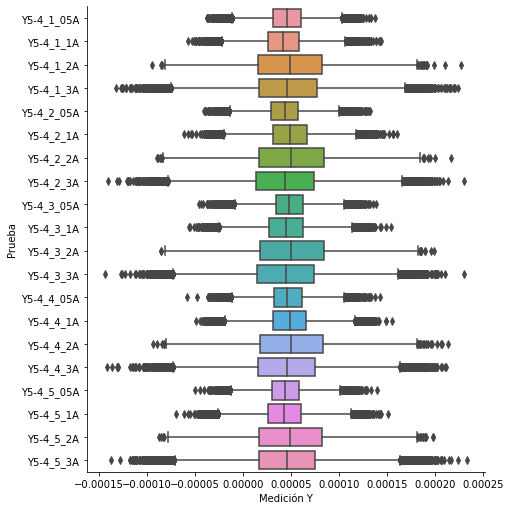

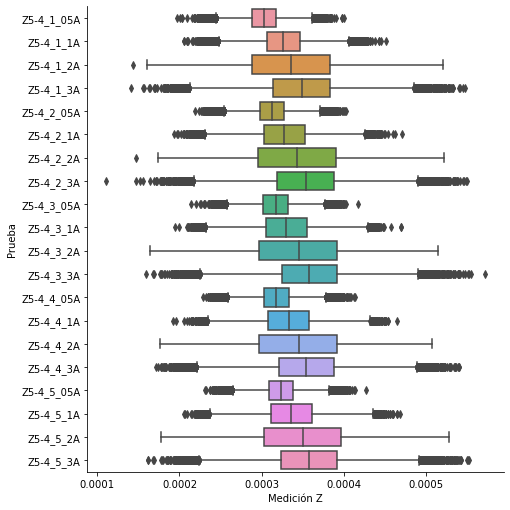

In [56]:
g = sns.catplot(data=basex, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición X", "Prueba")
g = sns.catplot(data=basey, orient="h",kind="box", height = 7)
g.set_axis_labels("Medición Y", "Prueba")
g = sns.catplot(data=basez, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición Z", "Prueba")

# Sensor 6

In [57]:
base_1 = dataframe_chipeado(prueba_1, 16, 19, 6)
base_1

,X6-1_10_05A,Y6-1_10_05A,Z6-1_10_05A,X6-1_10_1A,Y6-1_10_1A,Z6-1_10_1A,X6-1_10_2A,Y6-1_10_2A,Z6-1_10_2A,X6-1_10_3A,...,Z6-1_9_05A,X6-1_9_1A,Y6-1_9_1A,Z6-1_9_1A,X6-1_9_2A,Y6-1_9_2A,Z6-1_9_2A,X6-1_9_3A,Y6-1_9_3A,Z6-1_9_3A
0,0.000267,0.000030,0.000054,0.000322,0.000012,0.000069,0.000186,-5.524327e-05,0.000029,0.000134,...,0.000066,0.000325,0.000036,0.000062,0.000424,-0.000064,0.000049,0.000538,0.000027,0.000220
1,0.000244,0.000066,0.000108,0.000264,0.000013,0.000095,0.000189,5.088611e-05,0.000109,0.000361,...,0.000089,0.000319,0.000076,0.000086,0.000120,0.000058,0.000083,0.000093,0.000059,-0.000051
2,0.000161,0.000048,0.000026,0.000154,0.000030,0.000108,0.000430,-1.437736e-05,0.000084,0.000296,...,0.000077,0.000139,0.000056,0.000079,0.000041,0.000023,0.000021,0.000234,-0.000016,0.000079
3,0.000256,0.000077,0.000074,0.000110,-0.000002,0.000053,0.000217,-3.398456e-06,0.000070,0.000089,...,0.000079,0.000163,-0.000011,0.000053,0.000338,-0.000042,0.000041,0.000375,0.000011,0.000144
4,0.000321,0.000061,0.000111,0.000278,0.000025,0.000068,0.000050,1.033409e-04,0.000067,0.000257,...,0.000080,0.000237,0.000048,0.000089,0.000282,0.000148,0.000082,-0.000053,0.000044,0.000040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99092,0.000245,0.000008,0.000091,0.000250,0.000017,0.000074,0.000257,-2.047675e-05,0.000055,0.000096,...,0.000076,0.000266,-0.000028,0.000072,0.000360,-0.000052,0.000041,0.000206,0.000057,0.000070
99093,0.000265,0.000047,0.000125,0.000251,-0.000008,0.000078,0.000162,3.014819e-05,0.000098,0.000021,...,0.000050,0.000258,0.000009,0.000100,0.000301,0.000039,0.000110,0.000174,-0.000054,0.000111
99094,0.000228,0.000039,0.000116,0.000210,0.000061,0.000109,0.000235,2.700934e-06,0.000022,0.000476,...,0.000076,0.000196,0.000009,0.000077,0.000075,0.000066,0.000108,0.000290,0.000094,0.000077
99095,0.000219,0.000051,0.000098,0.000169,0.000018,0.000097,0.000356,2.611780e-07,0.000136,0.000191,...,0.000108,0.000201,-0.000015,0.000058,0.000213,-0.000070,0.000040,0.000260,0.000003,0.000004


In [58]:
base_1.isnull().sum()

X6-1_10_05A    0
Y6-1_10_05A    0
Z6-1_10_05A    0
X6-1_10_1A     0
Y6-1_10_1A     0
              ..
Y6-1_9_2A      0
Z6-1_9_2A      0
X6-1_9_3A      0
Y6-1_9_3A      0
Z6-1_9_3A      0
Length: 120, dtype: int64

In [59]:
corr_matrix = base_1.corr()
corr_matrix.head()

,X6-1_10_05A,Y6-1_10_05A,Z6-1_10_05A,X6-1_10_1A,Y6-1_10_1A,Z6-1_10_1A,X6-1_10_2A,Y6-1_10_2A,Z6-1_10_2A,X6-1_10_3A,...,Z6-1_9_05A,X6-1_9_1A,Y6-1_9_1A,Z6-1_9_1A,X6-1_9_2A,Y6-1_9_2A,Z6-1_9_2A,X6-1_9_3A,Y6-1_9_3A,Z6-1_9_3A
X6-1_10_05A,1.000000,0.151071,0.195767,0.483167,0.008972,0.001188,-0.545659,0.015734,-0.129891,-0.255752,...,-0.043425,0.394839,-0.005751,-0.051936,0.535968,0.039819,0.144663,-0.257528,-0.023867,0.005439
Y6-1_10_05A,0.151071,1.000000,0.170056,0.010900,-0.005287,-0.031658,0.006886,-0.013340,-0.016203,0.022407,...,0.003742,0.009606,-0.003519,-0.032456,0.004578,0.005302,-0.029523,0.007474,-0.019502,-0.025992
Z6-1_10_05A,0.195767,0.170056,1.000000,0.038805,0.029760,-0.010188,-0.009412,0.009525,-0.002201,0.035793,...,0.000488,0.029779,0.013580,-0.046414,0.023387,-0.003290,-0.015559,0.071607,0.006897,0.082307
X6-1_10_1A,0.483167,0.010900,0.038805,1.000000,-0.092044,0.320314,-0.412926,-0.252084,-0.251039,-0.068679,...,-0.016213,0.881867,-0.136728,0.210704,0.591378,-0.135742,0.191054,-0.096039,-0.184532,-0.181925
Y6-1_10_1A,0.008972,-0.005287,0.029760,-0.092044,1.000000,0.005924,-0.261761,0.413877,0.017337,0.056232,...,-0.008842,-0.163818,0.355020,-0.144700,-0.275493,0.404755,-0.002393,-0.220529,0.290909,0.026916


In [60]:
basex = base_1.iloc[:,0::3]
basey = base_1.iloc[:,1::3]
basez = base_1.iloc[:,2::3]

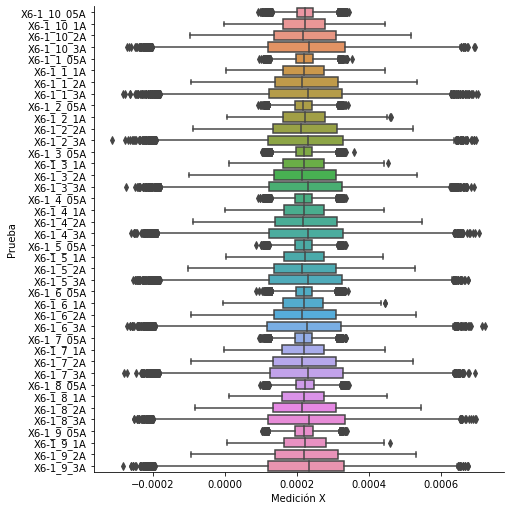

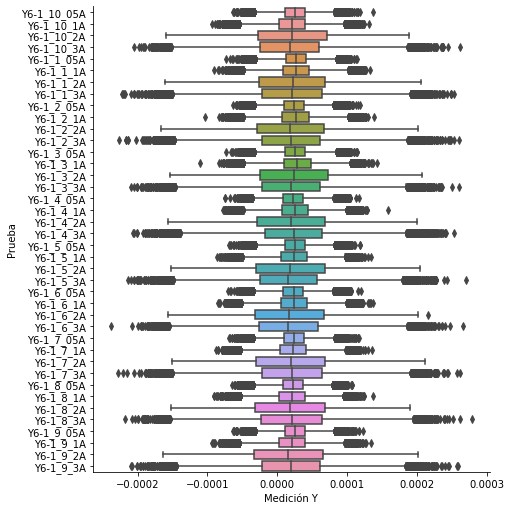

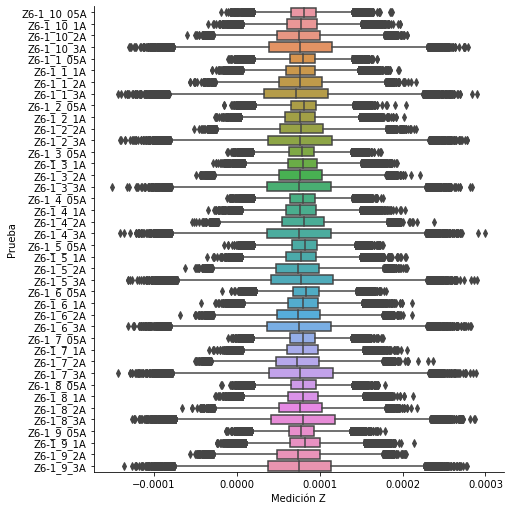

In [61]:
g = sns.catplot(data=basex, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición X", "Prueba")
g = sns.catplot(data=basey, orient="h",kind="box", height = 7)
g.set_axis_labels("Medición Y", "Prueba")
g = sns.catplot(data=basez, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición Z", "Prueba")

### Unlocked Bolt

In [62]:
base_4 = dataframe_chipeado(prueba_4, 16, 19, 6)
base_4.head()

,X6-4_1_05A,Y6-4_1_05A,Z6-4_1_05A,X6-4_1_1A,Y6-4_1_1A,Z6-4_1_1A,X6-4_1_2A,Y6-4_1_2A,Z6-4_1_2A,X6-4_1_3A,...,Z6-4_5_05A,X6-4_5_1A,Y6-4_5_1A,Z6-4_5_1A,X6-4_5_2A,Y6-4_5_2A,Z6-4_5_2A,X6-4_5_3A,Y6-4_5_3A,Z6-4_5_3A
0,0.000202,0.000010,0.000085,0.000252,0.000058,0.000115,0.000275,0.000097,0.000068,0.000322,...,0.000080,0.000138,0.000053,0.000080,0.000238,0.000030,0.000085,0.000274,0.000005,0.000116
1,0.000178,0.000021,0.000022,0.000232,0.000067,0.000105,0.000339,-0.000005,0.000138,0.000296,...,0.000056,0.000223,0.000021,0.000069,0.000139,-0.000062,0.000033,0.000217,0.000109,0.000053
2,0.000256,0.000023,0.000089,0.000180,0.000045,0.000105,0.000075,0.000080,0.000008,0.000121,...,0.000119,0.000185,0.000009,0.000016,0.000078,0.000033,0.000047,0.000222,-0.000011,0.000014
3,0.000260,0.000062,0.000077,0.000185,0.000006,0.000066,0.000219,0.000035,0.000075,0.000208,...,0.000105,0.000273,0.000019,0.000101,0.000344,0.000039,0.000144,0.000291,-0.000006,0.000174
4,0.000209,0.000092,0.000097,0.000280,0.000023,0.000110,0.000196,0.000028,0.000077,0.000467,...,0.000080,0.000178,0.000038,0.000088,0.000271,0.000049,0.000029,0.000204,0.000095,0.000060


In [63]:
base_4.isnull().sum()

X6-4_1_05A    0
Y6-4_1_05A    0
Z6-4_1_05A    0
X6-4_1_1A     0
Y6-4_1_1A     0
Z6-4_1_1A     0
X6-4_1_2A     0
Y6-4_1_2A     0
Z6-4_1_2A     0
X6-4_1_3A     0
Y6-4_1_3A     0
Z6-4_1_3A     0
X6-4_2_05A    0
Y6-4_2_05A    0
Z6-4_2_05A    0
X6-4_2_1A     0
Y6-4_2_1A     0
Z6-4_2_1A     0
X6-4_2_2A     0
Y6-4_2_2A     0
Z6-4_2_2A     0
X6-4_2_3A     0
Y6-4_2_3A     0
Z6-4_2_3A     0
X6-4_3_05A    0
Y6-4_3_05A    0
Z6-4_3_05A    0
X6-4_3_1A     0
Y6-4_3_1A     0
Z6-4_3_1A     0
X6-4_3_2A     0
Y6-4_3_2A     0
Z6-4_3_2A     0
X6-4_3_3A     0
Y6-4_3_3A     0
Z6-4_3_3A     0
X6-4_4_05A    0
Y6-4_4_05A    0
Z6-4_4_05A    0
X6-4_4_1A     0
Y6-4_4_1A     0
Z6-4_4_1A     0
X6-4_4_2A     0
Y6-4_4_2A     0
Z6-4_4_2A     0
X6-4_4_3A     0
Y6-4_4_3A     0
Z6-4_4_3A     0
X6-4_5_05A    0
Y6-4_5_05A    0
Z6-4_5_05A    0
X6-4_5_1A     0
Y6-4_5_1A     0
Z6-4_5_1A     0
X6-4_5_2A     0
Y6-4_5_2A     0
Z6-4_5_2A     0
X6-4_5_3A     0
Y6-4_5_3A     0
Z6-4_5_3A     0
dtype: int64

In [64]:
corr_matrix = base_4.corr()
corr_matrix.head()

,X6-4_1_05A,Y6-4_1_05A,Z6-4_1_05A,X6-4_1_1A,Y6-4_1_1A,Z6-4_1_1A,X6-4_1_2A,Y6-4_1_2A,Z6-4_1_2A,X6-4_1_3A,...,Z6-4_5_05A,X6-4_5_1A,Y6-4_5_1A,Z6-4_5_1A,X6-4_5_2A,Y6-4_5_2A,Z6-4_5_2A,X6-4_5_3A,Y6-4_5_3A,Z6-4_5_3A
X6-4_1_05A,1.000000,0.154489,0.262671,-0.493852,-0.048601,-0.112468,-0.414076,0.021168,-0.069129,-0.413878,...,-0.075539,0.443733,0.029919,0.071343,-0.180695,-0.064159,-0.159405,0.257754,-0.009697,0.018734
Y6-4_1_05A,0.154489,1.000000,0.168015,-0.038397,0.021277,0.006154,-0.059316,-0.013970,-0.043234,0.022200,...,-0.014064,0.024738,0.024966,-0.003873,0.024564,-0.005858,-0.024395,0.001013,0.008330,-0.017251
Z6-4_1_05A,0.262671,0.168015,1.000000,-0.085553,-0.012756,-0.017467,-0.158568,-0.025096,-0.081656,-0.138940,...,-0.015146,0.110826,0.017666,0.058605,0.065966,-0.031868,0.033805,0.038758,0.003052,-0.024701
X6-4_1_1A,-0.493852,-0.038397,-0.085553,1.000000,0.082789,0.420341,0.575454,0.015736,0.069320,0.311708,...,0.102358,-0.714218,0.048873,-0.190664,0.138326,0.122752,0.222155,-0.516025,-0.045096,-0.245156
Y6-4_1_1A,-0.048601,0.021277,-0.012756,0.082789,1.000000,0.217751,-0.008782,0.166791,0.013668,0.054723,...,-0.029691,-0.104554,0.106357,-0.066618,-0.094798,0.069278,-0.083657,0.053086,-0.055934,0.048950


In [65]:
basex = base_4.iloc[:,0::3]
basey = base_4.iloc[:,1::3]
basez = base_4.iloc[:,2::3]

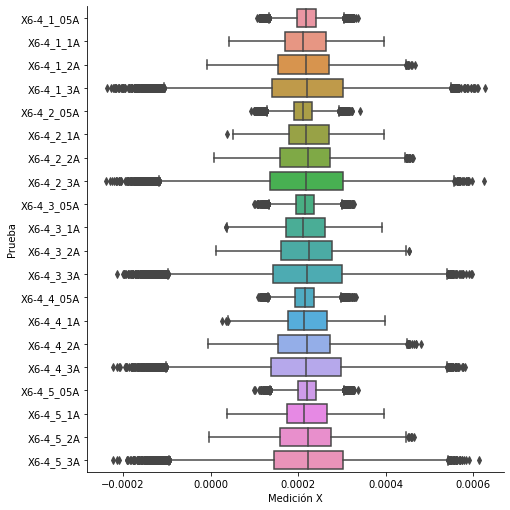

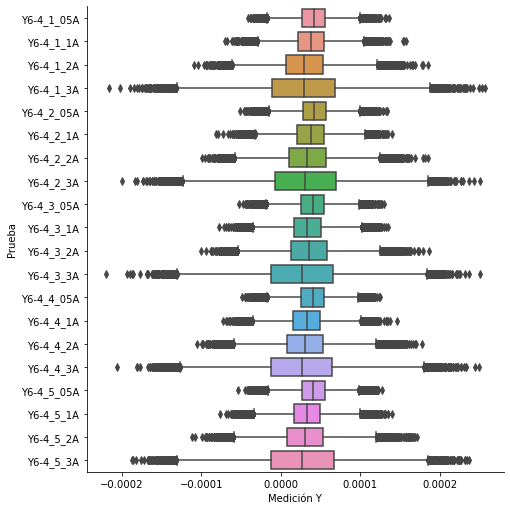

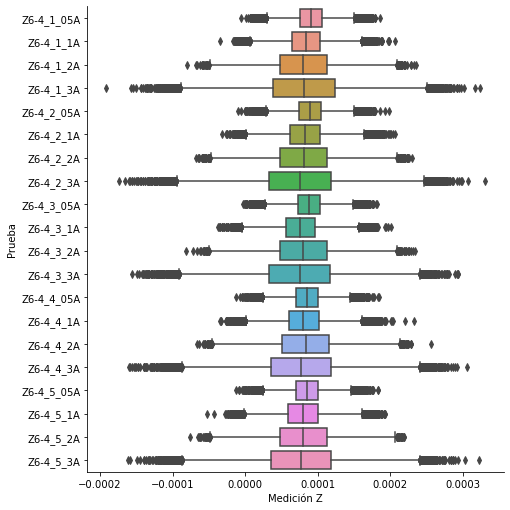

In [66]:
g = sns.catplot(data=basex, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición X", "Prueba")
g = sns.catplot(data=basey, orient="h",kind="box", height = 7)
g.set_axis_labels("Medición Y", "Prueba")
g = sns.catplot(data=basez, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición Z", "Prueba")

# Sensor 7

In [67]:
base_1 = dataframe_chipeado(prueba_1, 19, 22, 7)
base_1

,X7-1_10_05A,Y7-1_10_05A,Z7-1_10_05A,X7-1_10_1A,Y7-1_10_1A,Z7-1_10_1A,X7-1_10_2A,Y7-1_10_2A,Z7-1_10_2A,X7-1_10_3A,...,Z7-1_9_05A,X7-1_9_1A,Y7-1_9_1A,Z7-1_9_1A,X7-1_9_2A,Y7-1_9_2A,Z7-1_9_2A,X7-1_9_3A,Y7-1_9_3A,Z7-1_9_3A
0,0.000262,0.000176,0.000132,0.000359,0.000215,0.000178,0.000068,0.000387,0.000150,0.000093,...,0.000150,0.000308,0.000210,0.000201,0.000298,0.000348,0.000226,0.000128,0.000254,0.000260
1,0.000247,0.000111,0.000165,0.000284,0.000147,0.000156,0.000292,-0.000010,0.000191,0.000294,...,0.000201,0.000244,0.000159,0.000149,0.000197,0.000122,0.000110,0.000298,0.000081,0.000035
2,0.000167,0.000172,0.000110,0.000166,0.000216,0.000166,0.000377,0.000257,0.000184,0.000346,...,0.000166,0.000171,0.000139,0.000119,0.000049,0.000079,0.000147,0.000378,0.000242,0.000201
3,0.000219,0.000191,0.000155,0.000206,0.000154,0.000158,0.000200,0.000225,0.000071,0.000060,...,0.000165,0.000136,0.000171,0.000122,0.000266,0.000290,0.000120,0.000126,0.000161,0.000093
4,0.000241,0.000171,0.000142,0.000283,0.000165,0.000140,0.000048,0.000017,0.000133,0.000098,...,0.000143,0.000280,0.000095,0.000152,0.000355,-0.000016,0.000149,0.000194,0.000075,0.000099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99092,0.000235,0.000100,0.000141,0.000244,0.000167,0.000167,0.000129,0.000314,0.000194,0.000033,...,0.000119,0.000217,0.000220,0.000129,0.000342,0.000236,0.000208,0.000163,0.000301,0.000223
99093,0.000231,0.000193,0.000161,0.000335,0.000146,0.000163,0.000173,0.000066,0.000165,0.000203,...,0.000158,0.000352,0.000143,0.000157,0.000326,0.000128,0.000177,0.000147,0.000077,0.000069
99094,0.000207,0.000178,0.000125,0.000203,0.000190,0.000116,0.000283,0.000116,0.000107,0.000250,...,0.000145,0.000203,0.000191,0.000115,0.000148,0.000132,0.000079,0.000347,0.000084,0.000207
99095,0.000183,0.000126,0.000179,0.000158,0.000141,0.000122,0.000345,0.000231,0.000251,0.000289,...,0.000151,0.000135,0.000190,0.000115,0.000089,0.000292,0.000183,0.000230,0.000290,0.000140


In [68]:
base_1.isnull().sum()

X7-1_10_05A    0
Y7-1_10_05A    0
Z7-1_10_05A    0
X7-1_10_1A     0
Y7-1_10_1A     0
              ..
Y7-1_9_2A      0
Z7-1_9_2A      0
X7-1_9_3A      0
Y7-1_9_3A      0
Z7-1_9_3A      0
Length: 120, dtype: int64

In [69]:
corr_matrix = base_1.corr()
corr_matrix.head()

,X7-1_10_05A,Y7-1_10_05A,Z7-1_10_05A,X7-1_10_1A,Y7-1_10_1A,Z7-1_10_1A,X7-1_10_2A,Y7-1_10_2A,Z7-1_10_2A,X7-1_10_3A,...,Z7-1_9_05A,X7-1_9_1A,Y7-1_9_1A,Z7-1_9_1A,X7-1_9_2A,Y7-1_9_2A,Z7-1_9_2A,X7-1_9_3A,Y7-1_9_3A,Z7-1_9_3A
X7-1_10_05A,1.000000,0.009201,0.108637,0.508833,-0.049280,0.164727,-0.597233,-0.037187,-0.129833,-0.416190,...,0.082176,0.437274,-0.060007,0.163536,0.591944,0.037965,0.080762,-0.448506,-0.037619,-0.044420
Y7-1_10_05A,0.009201,1.000000,0.038470,0.041544,-0.010035,0.021675,-0.005763,-0.064949,-0.023713,0.042371,...,0.030813,0.051404,-0.063025,0.001113,0.000820,-0.146869,-0.060686,0.115356,-0.106935,-0.046879
Z7-1_10_05A,0.108637,0.038470,1.000000,0.060893,-0.022947,0.003365,-0.103444,-0.004176,0.030842,-0.107096,...,0.030296,0.031607,-0.034782,-0.021791,0.110558,0.001857,-0.039311,-0.077668,-0.008968,-0.033832
X7-1_10_1A,0.508833,0.041544,0.060893,1.000000,0.080242,0.243400,-0.709140,-0.033100,-0.056957,-0.284893,...,0.129277,0.852715,0.036318,0.247389,0.575835,0.101008,0.065657,-0.282945,-0.030688,0.035772
Y7-1_10_1A,-0.049280,-0.010035,-0.022947,0.080242,1.000000,0.277779,-0.128759,0.671101,0.432116,-0.058765,...,-0.046717,0.082484,0.530962,0.267868,-0.256794,0.601844,0.396010,0.070478,0.587840,0.441476


In [70]:
basex = base_1.iloc[:,0::3]
basey = base_1.iloc[:,1::3]
basez = base_1.iloc[:,2::3]

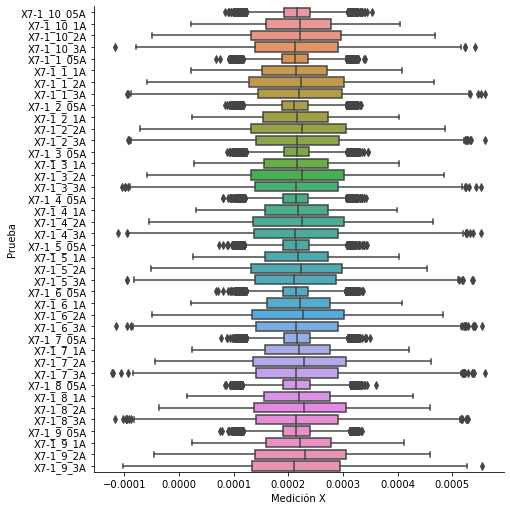

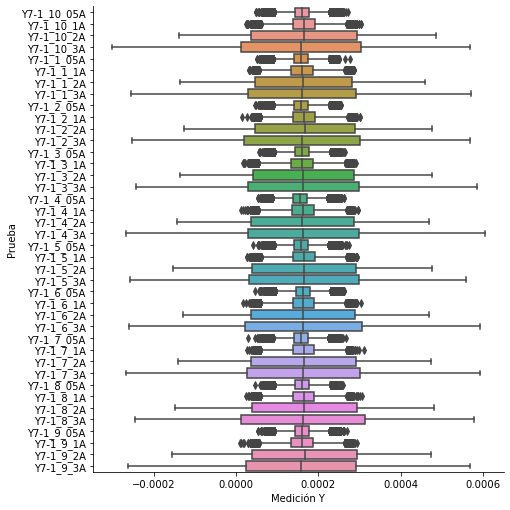

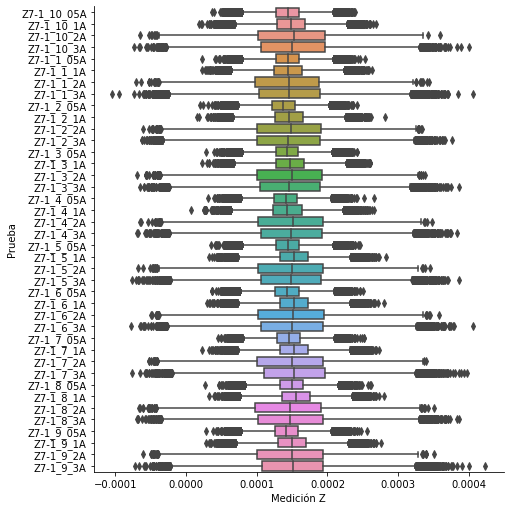

In [71]:
g = sns.catplot(data=basex, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición X", "Prueba")
g = sns.catplot(data=basey, orient="h",kind="box", height = 7)
g.set_axis_labels("Medición Y", "Prueba")
g = sns.catplot(data=basez, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición Z", "Prueba")

### Unlocked Bolt

In [72]:
base_4 = dataframe_chipeado(prueba_4, 19, 22, 7)
base_4.head()

,X7-4_1_05A,Y7-4_1_05A,Z7-4_1_05A,X7-4_1_1A,Y7-4_1_1A,Z7-4_1_1A,X7-4_1_2A,Y7-4_1_2A,Z7-4_1_2A,X7-4_1_3A,...,Z7-4_5_05A,X7-4_5_1A,Y7-4_5_1A,Z7-4_5_1A,X7-4_5_2A,Y7-4_5_2A,Z7-4_5_2A,X7-4_5_3A,Y7-4_5_3A,Z7-4_5_3A
0,0.000151,0.000136,0.000116,0.000258,0.000167,0.000146,0.000279,0.000206,0.000109,0.000198,...,0.000102,0.000169,0.000157,0.000128,0.000303,0.000129,0.000113,0.000187,0.000098,0.000118
1,0.000203,0.000139,0.000076,0.000297,0.000156,0.000097,0.000245,0.000104,0.000228,0.000402,...,0.000105,0.000121,0.000087,0.000075,0.000089,0.000124,0.000053,0.000181,0.000231,0.000282
2,0.000225,0.000162,0.000098,0.000121,0.000140,0.000155,0.000224,0.000165,0.000057,0.000123,...,0.000078,0.000282,0.000116,0.000119,0.000163,0.000132,0.000134,0.000233,0.000092,0.000151
3,0.000212,0.000178,0.000123,0.000176,0.000168,0.000166,0.000058,0.000126,0.000153,0.000074,...,0.000111,0.000239,0.000154,0.000104,0.000211,0.000088,0.000183,0.000348,0.000204,0.000189
4,0.000183,0.000170,0.000114,0.000298,0.000189,0.000110,0.000226,0.000131,0.000118,0.000305,...,0.000102,0.000135,0.000139,0.000109,0.000346,0.000142,0.000101,0.000145,0.000170,0.000072


In [73]:
base_4.isnull().sum()

X7-4_1_05A    0
Y7-4_1_05A    0
Z7-4_1_05A    0
X7-4_1_1A     0
Y7-4_1_1A     0
Z7-4_1_1A     0
X7-4_1_2A     0
Y7-4_1_2A     0
Z7-4_1_2A     0
X7-4_1_3A     0
Y7-4_1_3A     0
Z7-4_1_3A     0
X7-4_2_05A    0
Y7-4_2_05A    0
Z7-4_2_05A    0
X7-4_2_1A     0
Y7-4_2_1A     0
Z7-4_2_1A     0
X7-4_2_2A     0
Y7-4_2_2A     0
Z7-4_2_2A     0
X7-4_2_3A     0
Y7-4_2_3A     0
Z7-4_2_3A     0
X7-4_3_05A    0
Y7-4_3_05A    0
Z7-4_3_05A    0
X7-4_3_1A     0
Y7-4_3_1A     0
Z7-4_3_1A     0
X7-4_3_2A     0
Y7-4_3_2A     0
Z7-4_3_2A     0
X7-4_3_3A     0
Y7-4_3_3A     0
Z7-4_3_3A     0
X7-4_4_05A    0
Y7-4_4_05A    0
Z7-4_4_05A    0
X7-4_4_1A     0
Y7-4_4_1A     0
Z7-4_4_1A     0
X7-4_4_2A     0
Y7-4_4_2A     0
Z7-4_4_2A     0
X7-4_4_3A     0
Y7-4_4_3A     0
Z7-4_4_3A     0
X7-4_5_05A    0
Y7-4_5_05A    0
Z7-4_5_05A    0
X7-4_5_1A     0
Y7-4_5_1A     0
Z7-4_5_1A     0
X7-4_5_2A     0
Y7-4_5_2A     0
Z7-4_5_2A     0
X7-4_5_3A     0
Y7-4_5_3A     0
Z7-4_5_3A     0
dtype: int64

In [74]:
corr_matrix = base_4.corr()
corr_matrix.head()

,X7-4_1_05A,Y7-4_1_05A,Z7-4_1_05A,X7-4_1_1A,Y7-4_1_1A,Z7-4_1_1A,X7-4_1_2A,Y7-4_1_2A,Z7-4_1_2A,X7-4_1_3A,...,Z7-4_5_05A,X7-4_5_1A,Y7-4_5_1A,Z7-4_5_1A,X7-4_5_2A,Y7-4_5_2A,Z7-4_5_2A,X7-4_5_3A,Y7-4_5_3A,Z7-4_5_3A
X7-4_1_05A,1.000000,0.082991,0.094440,-0.533919,-0.097152,-0.098436,-0.413711,0.032502,-0.143819,-0.469192,...,0.070630,0.465457,0.015365,0.126463,-0.172179,-0.250774,0.029845,0.405194,0.017913,0.087223
Y7-4_1_05A,0.082991,1.000000,0.039318,-0.070754,-0.053047,-0.006068,-0.116189,-0.053370,0.017289,-0.086687,...,0.019585,0.147510,0.105075,0.018744,0.115931,0.006002,0.026344,0.091487,0.034321,-0.011857
Z7-4_1_05A,0.094440,0.039318,1.000000,-0.054397,0.010475,-0.026028,-0.006698,0.084562,-0.058393,-0.075598,...,-0.007697,0.029944,-0.008710,0.071070,-0.093121,-0.090768,0.084775,0.018959,-0.013644,-0.008656
X7-4_1_1A,-0.533919,-0.070754,-0.054397,1.000000,0.236259,0.205850,0.555096,-0.042648,0.237964,0.586851,...,-0.095775,-0.693796,-0.067406,-0.158289,0.096836,0.241494,-0.020122,-0.651226,-0.004924,-0.179942
Y7-4_1_1A,-0.097152,-0.053047,0.010475,0.236259,1.000000,0.096716,0.276108,0.104983,0.128505,0.135126,...,-0.009965,-0.282562,-0.120965,0.017697,-0.270404,0.018336,-0.147458,-0.258976,-0.093253,0.021117


In [75]:
basex = base_4.iloc[:,0::3]
basey = base_4.iloc[:,1::3]
basez = base_4.iloc[:,2::3]

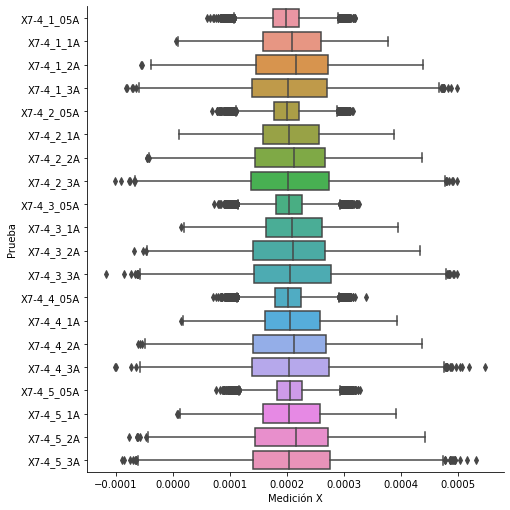

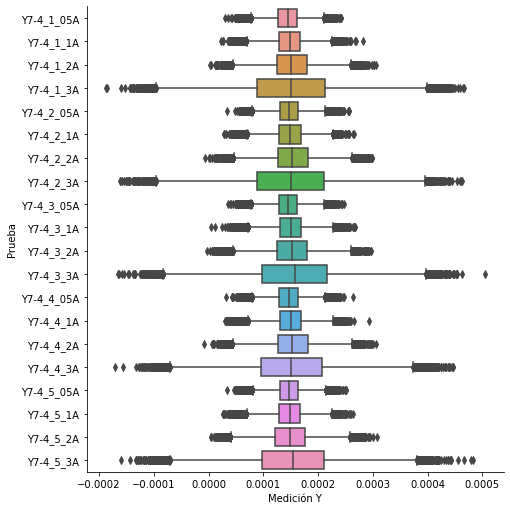

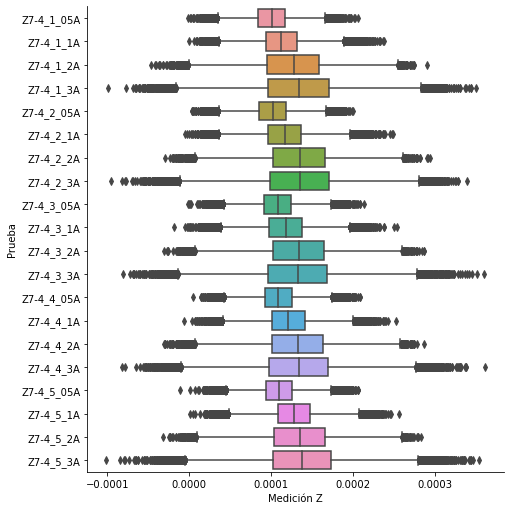

In [76]:
g = sns.catplot(data=basex, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición X", "Prueba")
g = sns.catplot(data=basey, orient="h",kind="box", height = 7)
g.set_axis_labels("Medición Y", "Prueba")
g = sns.catplot(data=basez, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición Z", "Prueba")

# Sensor 8

In [ ]:
base_1 = dataframe_chipeado(prueba_1, 22, 25, 8)
base_1

In [ ]:
base_1.isnull().sum()

In [ ]:
corr_matrix = base_1.corr()
corr_matrix.head()

In [ ]:
basex = base_1.iloc[:,0::3]
basey = base_1.iloc[:,1::3]
basez = base_1.iloc[:,2::3]

In [ ]:
g = sns.catplot(data=basex, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición X", "Prueba")
g = sns.catplot(data=basey, orient="h",kind="box", height = 7)
g.set_axis_labels("Medición Y", "Prueba")
g = sns.catplot(data=basez, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición Z", "Prueba")

### Unlocked Bolt

In [ ]:
base_4 = dataframe_chipeado(prueba_4, 22, 25, 8)
base_4.head()

In [ ]:
base_4.isnull().sum()

In [ ]:
corr_matrix = base_4.corr()
corr_matrix.head()

In [ ]:
basex = base_4.iloc[:,0::3]
basey = base_4.iloc[:,1::3]
basez = base_4.iloc[:,2::3]

In [ ]:
g = sns.catplot(data=basex, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición X", "Prueba")
g = sns.catplot(data=basey, orient="h",kind="box", height = 7)
g.set_axis_labels("Medición Y", "Prueba")
g = sns.catplot(data=basez, orient="h", kind="box", height = 7)
g.set_axis_labels("Medición Z", "Prueba")